# Alkemy project Group D

* Lorenzo Baglini - 748741

* Edoardo Borriello - 750051

* Filippo Piccaro - 749521

* Anastasia Picchia - 752251


# TASK 0

### Importing necessary libraries

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from matplotlib import pyplot
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
import plotly
import plotly.graph_objects as go
import plotly.express as px

### Importing the dataset

In [110]:
clickbidding=pd.read_csv("clicks_bidding.csv")
clickregular=pd.read_csv("clicks_regular.csv")
pricescompetitor=pd.read_csv("prices_competitor.csv")
productcatalog=pd.read_csv("product_catalog.csv")
salesdata=pd.read_csv("sales_data.csv")
sellerslist=pd.read_csv("sellers_list.csv")
stock=pd.read_csv("stock.csv")

In [111]:
clickbidding

,date,seller,position,price_max,price_min,price,type,product_id
0,2021-04-02 11:48:02,48,1,25990.0,21990.0,25990.0,Bidding,140476
1,2021-04-02 11:48:04,180,1,51990.0,42989.0,45490.0,Bidding,123606
2,2021-04-02 11:48:15,24,1,53990.0,48789.0,38790.0,Bidding,157285
3,2021-04-02 11:48:16,48,1,10699.0,8450.0,8990.0,Bidding,113103
4,2021-04-02 11:48:59,24,1,67199.0,67199.0,55990.0,Bidding,151375
...,...,...,...,...,...,...,...,...
696994,2022-01-04 14:16:13,407,1,32999.0,26490.0,27990.0,Bidding,146646
696995,2022-01-04 14:16:26,407,2,3973.0,2390.0,2408.0,Bidding,133928
696996,2022-01-04 14:18:00,24,1,34990.0,32987.0,34990.0,Bidding,140183
696997,2022-01-04 14:18:23,407,1,30999.0,26015.0,26190.0,Bidding,155488


In [112]:
clickregular

,date,seller,position,price_max,price_min,price,type,product_id
0,2020-01-01 00:28:01,48,NaN,5290.0,5290.0,NaN,Regular,148875
1,2020-01-01 00:29:40,48,NaN,11787.0,9990.0,NaN,Regular,104538
2,2020-01-01 00:30:39,23,NaN,16217.0,16217.0,NaN,Regular,108283
3,2020-01-01 00:42:23,48,NaN,7399.0,6398.0,NaN,Regular,144718
4,2020-01-01 00:42:51,407,NaN,3343.0,2299.0,NaN,Regular,144776
...,...,...,...,...,...,...,...,...
2252926,2022-01-04 11:58:42,48,1.0,3190.0,2999.0,2999.0,Regular,182682
2252927,2022-01-04 11:59:52,41,1.0,29990.0,24442.0,24442.0,Regular,141881
2252928,2022-01-04 11:59:54,41,3.0,3725.0,1990.0,2195.0,Regular,147728
2252929,2022-01-04 12:00:00,41,3.0,62990.0,52989.0,53051.0,Regular,128385


In [113]:
pricescompetitor

,comp_date,seller_id,product_id,price
0,2021-01-01,23,110064,27990
1,2021-01-01,24,110064,27990
2,2021-01-01,26,110064,27990
3,2021-01-01,41,110064,27490
4,2021-01-01,48,110064,27990
...,...,...,...,...
8473031,2021-12-31,24,163535,19990
8473032,2021-12-31,24,172307,14649
8473033,2021-12-31,26,172307,12207
8473034,2021-12-31,41,164799,19798


In [114]:
productcatalog

,product_id,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name
0,109844,1776,1504,732,367,1539
1,119374,1776,1504,732,367,1748
2,131012,1776,1504,1907,367,2849
3,131031,1776,1504,1907,367,2841
4,131306,1776,1504,1907,213,2745
...,...,...,...,...,...,...
7524,164816,2180,834,938,615,2843
7525,164817,2180,834,938,615,2842
7526,164818,2180,834,938,615,2844
7527,164820,2180,834,938,615,2843


In [115]:
salesdata

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000
...,...,...,...,...,...,...,...,...
119120,2021-12-31,184595,2,3290.0,4433.0,2742.0,3694.4444,2474.2500
119121,2021-12-31,184647,1,1990.0,2878.0,1658.0,2398.1481,1638.0000
119122,2021-12-31,184749,1,4990.0,5544.0,4158.0,4620.3704,3600.0000
119123,2021-12-31,184809,1,2590.0,2878.0,2158.0,2398.1481,1650.0000


In [116]:
sellerslist

,seller_id,seller_name
0,48,F
1,180,B
2,24,G
3,41,I
4,26,H
5,490,L
6,188,E
7,407,D
8,23,C


In [117]:
stock.sort_values('stock_date')

,stock_date,product_id,total_stock
29846,2021-01-01,104496,51
441190,2021-01-01,151675,1
25880,2021-01-01,103035,49
1590112,2021-01-01,121983,5
239121,2021-01-01,143915,32
...,...,...,...
1938605,2021-12-31,166040,356
768753,2021-12-31,146102,17
1342186,2021-12-31,142375,1
1140849,2021-12-31,164942,1


### Check for null values in the various datasets

In [118]:
data_files_list=[clickbidding,clickregular, pricescompetitor, productcatalog, salesdata, sellerslist, stock]
for i in data_files_list:
    print(i.isna().sum())

date          0
seller        0
position      0
price_max     0
price_min     0
price         0
type          0
product_id    0
dtype: int64
date                0
seller              0
position      1093664
price_max           0
price_min           0
price         1093244
type                0
product_id          0
dtype: int64
comp_date     0
seller_id     0
product_id    0
price         0
dtype: int64
product_id     0
coded_cat1     0
coded_cat2     0
coded_cat3     0
coded_brand    0
coded_name     0
dtype: int64
sale_date            0
product_id           0
quantity             0
sales_price_tax      0
regular_price_tax    0
sales_price          0
regular_price        0
purchase_price       0
dtype: int64
seller_id      0
seller_name    0
dtype: int64
stock_date     0
product_id     0
total_stock    0
dtype: int64


The only nan values are in the "clickbidding" dataset, and only in the first part, the one refferring to the year 2020, which is not usefull to the scope of our analysis.

## Lets have a look at "pricescompetitor", "salesdatada" and "stock" datasets

#### This is the list of the seller_ids of our client(24) and our competitors in "pricescompetitor"

In [119]:
listcomp=[]
a=''
df= pricescompetitor.sort_values('seller_id')
for j in df["seller_id"]:
    
    if j!=a:
        listcomp.append(j)
        a=j
listcomp

[23, 24, 26, 41, 48, 180, 188, 407, 490]

#### Here we filter pricescompetitor for each seller_id, it will be usefull for later analysis

In [120]:
comp23=pricescompetitor[pricescompetitor['seller_id']==23].copy()
comp24=pricescompetitor[pricescompetitor['seller_id']==24].copy()
comp26=pricescompetitor[pricescompetitor['seller_id']==26].copy()
comp41=pricescompetitor[pricescompetitor['seller_id']==41].copy()
comp180=pricescompetitor[pricescompetitor['seller_id']==180].copy()
comp188=pricescompetitor[pricescompetitor['seller_id']==188].copy()
comp407=pricescompetitor[pricescompetitor['seller_id']==407].copy()
comp490=pricescompetitor[pricescompetitor['seller_id']==490].copy()
comp48=pricescompetitor[pricescompetitor['seller_id']==48].copy()
comp24

,comp_date,seller_id,product_id,price
1,2021-01-01,24,110064,27990
7,2021-01-01,24,151052,10499
11,2021-01-01,24,110822,1790
16,2021-01-01,24,110737,890
17,2021-01-01,24,136807,9490
...,...,...,...,...
8473023,2021-12-31,24,184466,44990
8473026,2021-12-31,24,184411,65990
8473029,2021-12-31,24,184523,62990
8473031,2021-12-31,24,163535,19990


This is the dataframe slice representing only the seller 24, which is our client.

### Lets confront the prices in pricescompetitor and salesdata

In order to do it, we filter both the datasets for the same product_id (112437), same date (2021-12-02) and pricescompetitor for our clied seller_id (24)

In [121]:
pricescompetitor1=pricescompetitor[pricescompetitor['product_id']==112437].copy()
pricescompetitor1=pricescompetitor1[pricescompetitor1['seller_id']==24]
pricescompetitor1=pricescompetitor1[pricescompetitor1['comp_date']=='2021-12-02']
pricescompetitor1

,comp_date,seller_id,product_id,price
7886110,2021-12-02,24,112437,8090


In [122]:
salesdata1=salesdata[salesdata["product_id"]==112437].copy()
salesdata1=salesdata1[salesdata1['sale_date']=='2021-12-02']
salesdata1

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price
106307,2021-12-02,112437,2,6890.0,8989.0,5742.0,7490.7407,5457.0


From this simple search we can say that there are some discrepancy in the prices between the two datasets

## Now lets see which are the products that each competitor sells

#### We use this defined function, which give us the total number of  unique products in prices competitor, how many products each competitor sells and how many are in common among all the sellers

In [123]:
def comparator(df):
    listproduct=list(pd.unique(df['product_id']))
    print("Number of our products in prices competitor: ", len(listproduct))
    ph=listproduct
    numprodcomp=[]
    product_idlist=[]
    a=''
    sellerlist=list(pd.unique(df['seller_id']))
    sellerlist.sort()
    for i in sellerlist:
        dfx=df[df['seller_id']==i]
        dfx= dfx.sort_values('product_id')
        for j in dfx["product_id"]:
            if j!=a:
                product_idlist.append(j)
                a=j
        numprodcomp.append(len(product_idlist))
        ph=list(set(ph).intersection(product_idlist))
        product_idlist=[]
            
    nproductspercomp=pd.DataFrame(data=numprodcomp, index=["comp23", "comp24","comp26","comp41","comp48", "comp180" ,"comp188" ,"comp407", "comp490"], columns=['number of products'])
    print("")
    print(nproductspercomp)
    print("")
    print("Number of products in common: ", len(ph))

In [124]:
ph=pricescompetitor.rename(columns={'comp_date':'date'})
comparator(ph)

Number of our products in prices competitor:  6461

         number of products
comp23                 2676
comp24                 6455
comp26                 5814
comp41                 3690
comp48                 5706
comp180                3421
comp188                3055
comp407                3111
comp490                2652

Number of products in common:  1039


### Let's see how many products we have in 'salesdata' dataset

In [125]:
print(len(list(pd.unique(salesdata['product_id']))))

7529


#### There is a discrepancy of more than 1000 products between salesdata and prices competitor:

Some products are in the ‘salesdata’ dataset but not in the ‘price competitor’ dataset. They probably don't appear because competitor 24 is the only one who sell them.

### Finding elements present in 'sales data' but not in 'comp', we use this function

In [126]:
def notincommon_list(df1,df2):
    notincommon=[]
    list2=df1["product_id"].unique().tolist()
    list1=df2["product_id"].unique().tolist()
    for i in list1:
        if i not in list2:
            notincommon.append(i)
    return notincommon 

In [189]:
notincommon=notincommon_list(comp24, salesdata)
print(len(notincommon))
print(notincommon)

1074
[131410, 150604, 156700, 107080, 108420, 108570, 109550, 112508, 112510, 121970, 122260, 130120, 131910, 132140, 132410, 132570, 133420, 134330, 135850, 139850, 140380, 140460, 142230, 142600, 143220, 143240, 143810, 143960, 144020, 144340, 144750, 145140, 146080, 146950, 151050, 152490, 152491, 153470, 154150, 154380, 156110, 157320, 157410, 157670, 160300, 132630, 143470, 147927, 151770, 160040, 106920, 108078, 112329, 112700, 113571, 121479, 121690, 122560, 125520, 128878, 131680, 142458, 144600, 145050, 145060, 145270, 147710, 147720, 148760, 152300, 152390, 152660, 153410, 154070, 154160, 154309, 154550, 154610, 155150, 156390, 157380, 160047, 104970, 105100, 108300, 110787, 121851, 122610, 123530, 124430, 126260, 128700, 130970, 133500, 134290, 135783, 135960, 136250, 138900, 139890, 142560, 142570, 143690, 144330, 144650, 145110, 147320, 147822, 149420, 151250, 151340, 154540, 154630, 154670, 155280, 155450, 156420, 156660, 158530, 158560, 159668, 159670, 159671, 160050, 10

#### Those products are the only ones that appears in saledata but not in price competitor

## Merging 'stock' e 'salesdata' dataset, in order to have the stock level for the product sold on a given day

In [128]:
generaldf=salesdata.rename(columns={'sale_date':'date'}).sort_values('date').copy()
stock1=stock.rename(columns={'stock_date':'date'}).sort_values('date').copy()
generaldf=generaldf.merge(stock1, how='right', on=['date', 'product_id'])
generaldf=generaldf.dropna().reset_index(drop=True)
generaldf

,date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,total_stock
0,2021-01-02,141972,1.0,9990.0,15544.0,8325.0,12953.3333,7908.7500,34
1,2021-01-02,156666,1.0,16990.0,18878.0,14158.0,15731.4815,12700.0000,99
2,2021-01-02,150604,1.0,20990.0,23322.0,17492.0,19435.1852,19258.0000,44
3,2021-01-02,142155,1.0,13990.0,15544.0,11658.0,12953.7000,9600.0000,52
4,2021-01-02,134294,1.0,4990.0,6666.0,4158.0,5554.6296,3599.4024,54
...,...,...,...,...,...,...,...,...,...
118272,2021-12-31,154818,2.0,45990.0,66656.0,38325.0,55546.2963,37433.3299,410
118273,2021-12-31,122069,1.0,2690.0,2690.0,2242.0,2241.6667,1832.6000,2
118274,2021-12-31,143709,1.0,2099.0,2332.0,1749.0,1943.5167,1159.4000,5
118275,2021-12-31,154897,2.0,2403.0,3433.0,2002.0,2861.1111,1950.0000,68


Stock and sales values do not always coincide. The stock level do not change according to our online sales as they probably refer to in-store sales.

### Lets merge our prices in pricescompetitor with salesdata

In [129]:
comp=comp24.rename(columns={'comp_date':'date', 'price':'price_in_competitor'}).sort_values('date').drop(columns='seller_id').copy()

generaldf=generaldf.merge(comp, how='left', on=['date', 'product_id'])
generaldf2=generaldf.dropna(axis=0, subset=['total_stock']).drop_duplicates(subset=['date',
 'product_id',
 'quantity',
 'sales_price_tax',
 'regular_price_tax',
 'sales_price',
 'regular_price',
 'purchase_price',
 'total_stock',])
generaldf2

,date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,total_stock,price_in_competitor
0,2021-01-02,141972,1.0,9990.0,15544.0,8325.0,12953.3333,7908.7500,34,9990.0
1,2021-01-02,156666,1.0,16990.0,18878.0,14158.0,15731.4815,12700.0000,99,16990.0
2,2021-01-02,150604,1.0,20990.0,23322.0,17492.0,19435.1852,19258.0000,44,NaN
3,2021-01-02,142155,1.0,13990.0,15544.0,11658.0,12953.7000,9600.0000,52,13990.0
4,2021-01-02,134294,1.0,4990.0,6666.0,4158.0,5554.6296,3599.4024,54,4990.0
...,...,...,...,...,...,...,...,...,...,...
129722,2021-12-31,154818,2.0,45990.0,66656.0,38325.0,55546.2963,37433.3299,410,45990.0
129723,2021-12-31,122069,1.0,2690.0,2690.0,2242.0,2241.6667,1832.6000,2,2690.0
129724,2021-12-31,143709,1.0,2099.0,2332.0,1749.0,1943.5167,1159.4000,5,2099.0
129725,2021-12-31,154897,2.0,2403.0,3433.0,2002.0,2861.1111,1950.0000,68,2403.0


Like we saw before, there are many discrepancy between the two datasets

#### The prices shown in ‘pricescompetitor’ do not always coincide with those in sales data, and not every time we have a price in salesdata we have one in pricescompetitor: after the merging we have many NaN values. 


### Eliminating the products sold only by us

In [130]:
for i in notincommon_list(comp24,stock):
    generaldf2.drop(generaldf2[generaldf2['product_id']==i].index, inplace=True)

In [131]:
generaldf2.isna().sum()

date                      0
product_id                0
quantity                  0
sales_price_tax           0
regular_price_tax         0
sales_price               0
regular_price             0
purchase_price            0
total_stock               0
price_in_competitor    6702
dtype: int64

### Creating new variables and adding them to the general dataset

In [132]:
generaldf2['discount_tax'] = generaldf2['regular_price_tax'] - generaldf2['sales_price_tax']
generaldf2['discount'] = generaldf2['regular_price'] -generaldf2['sales_price']
generaldf2['discount_percentage_tax'] = generaldf2['discount_tax']*100 / generaldf2['regular_price_tax']
generaldf2['discount_percentage'] = generaldf2['discount']*100 / generaldf2['regular_price']
generaldf2['sales_tax_percentage'] = (generaldf2['sales_price_tax']- generaldf2['sales_price'])*100 / generaldf2['sales_price']
generaldf2['regular_tax_percentage'] = (generaldf2['regular_price_tax']- generaldf2['regular_price'])*100 / generaldf2['regular_price']
generaldf2['profit'] = generaldf2['quantity'] * generaldf2['sales_price'] - generaldf2['purchase_price']
l=[]
c=0
for i in range(len(generaldf2['discount'])):
    if generaldf2.iloc[i,3]==generaldf2.iloc[i,4]:
        l.append(0)
    else:
        l.append(1)
generaldf2['discount bin']=l
l=[]
c=0
for i in generaldf2['profit']:
    if i>0:
        l.append('profit')
    elif i<0:
        l.append('loss')
    else:
        l.append('net')
generaldf2['profit encoded']=l
generaldf2

,date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,total_stock,price_in_competitor,discount_tax,discount,discount_percentage_tax,discount_percentage,sales_tax_percentage,regular_tax_percentage,profit,discount bin,profit encoded
0,2021-01-02,141972,1.0,9990.0,15544.0,8325.0,12953.3333,7908.7500,34,9990.0,5554.0,4628.3333,35.730829,35.730828,20.000000,20.000000,416.2500,1,profit
1,2021-01-02,156666,1.0,16990.0,18878.0,14158.0,15731.4815,12700.0000,99,16990.0,1888.0,1573.4815,10.001059,10.002119,20.002825,20.001412,1458.0000,1,profit
3,2021-01-02,142155,1.0,13990.0,15544.0,11658.0,12953.7000,9600.0000,52,13990.0,1554.0,1295.7000,9.997427,10.002548,20.003431,19.996603,2058.0000,1,profit
4,2021-01-02,134294,1.0,4990.0,6666.0,4158.0,5554.6296,3599.4024,54,4990.0,1676.0,1396.6296,25.142514,25.143524,20.009620,20.008002,558.5976,1,profit
5,2021-01-02,134298,1.0,5990.0,7777.0,4992.0,6480.5583,4199.4000,10,5990.0,1787.0,1488.5583,22.978012,22.969600,19.991987,20.005093,792.6000,1,profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129722,2021-12-31,154818,2.0,45990.0,66656.0,38325.0,55546.2963,37433.3299,410,45990.0,20666.0,17221.2963,31.003961,31.003501,20.000000,20.000800,39216.6701,1,profit
129723,2021-12-31,122069,1.0,2690.0,2690.0,2242.0,2241.6667,1832.6000,2,2690.0,0.0,-0.3333,0.000000,-0.014868,19.982159,19.999998,409.4000,0,profit
129724,2021-12-31,143709,1.0,2099.0,2332.0,1749.0,1943.5167,1159.4000,5,2099.0,233.0,194.5167,9.991424,10.008491,20.011435,19.988678,589.6000,1,profit
129725,2021-12-31,154897,2.0,2403.0,3433.0,2002.0,2861.1111,1950.0000,68,2403.0,1030.0,859.1111,30.002913,30.027184,20.029970,19.988350,2054.0000,1,profit


#### lets look at some information regarding this new general dataset

In [133]:
generaldf2.info()
generaldf2.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105138 entries, 0 to 129726
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     105138 non-null  object 
 1   product_id               105138 non-null  int64  
 2   quantity                 105138 non-null  float64
 3   sales_price_tax          105138 non-null  float64
 4   regular_price_tax        105138 non-null  float64
 5   sales_price              105138 non-null  float64
 6   regular_price            105138 non-null  float64
 7   purchase_price           105138 non-null  float64
 8   total_stock              105138 non-null  int64  
 9   price_in_competitor      98436 non-null   float64
 10  discount_tax             105138 non-null  float64
 11  discount                 105138 non-null  float64
 12  discount_percentage_tax  105138 non-null  float64
 13  discount_percentage      105138 non-null  float64
 14  sale

date                          0
product_id                    0
quantity                      0
sales_price_tax               0
regular_price_tax             0
sales_price                   0
regular_price                 0
purchase_price                0
total_stock                   0
price_in_competitor        6702
discount_tax                  0
discount                      0
discount_percentage_tax       0
discount_percentage           0
sales_tax_percentage          0
regular_tax_percentage        0
profit                        0
discount bin                  0
profit encoded                0
dtype: int64

# Data visualizatin


Sales prices vary with the change of time: perhaps they are related to seasonality or stock. Lets build a graph in order to study this.

In [135]:
generaldf2 = generaldf2.groupby('date').sum('profit')
generaldf2

,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,total_stock,price_in_competitor,discount_tax,discount,discount_percentage_tax,discount_percentage,sales_tax_percentage,regular_tax_percentage,profit,discount bin
date,,,,,,,,,,,,,,,,,
2021-01-02,1658265,12.0,111857.0,147351.0,93214.0,1.227921e+05,8.262580e+04,893,76218.0,35494.0,2.957813e+04,288.853557,288.850304,240.001840,240.009855,1.058820e+04,12
2021-01-03,970436,7.0,63591.0,97001.0,52992.0,8.083426e+04,4.200143e+04,942,43601.0,33410.0,2.784226e+04,222.998164,223.010673,140.030546,140.012991,1.099057e+04,7
2021-01-04,47557294,537.0,4870517.5,6423465.0,4058756.0,5.352889e+06,3.724706e+06,42441,4488952.0,1552947.5,1.294133e+06,8751.614263,8752.131372,6981.103367,6979.891137,2.131580e+06,342
2021-01-05,1682932,14.0,171873.0,235675.0,143227.0,1.963954e+05,1.400244e+05,2211,168784.0,63802.0,5.316845e+04,393.939693,393.928077,259.955292,259.982170,6.527626e+03,13
2021-01-06,55467560,659.0,6821097.0,8896008.0,5684244.0,7.413338e+06,5.243810e+06,50819,6672919.0,2074911.0,1.729094e+06,9587.831147,9588.028966,8020.130325,8019.865348,3.885456e+06,390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,79055149,733.0,8215545.0,10938371.0,6846286.0,9.115306e+06,6.272145e+06,91661,7396915.0,2722826.0,2.269020e+06,13104.567415,13103.970314,10758.971935,10759.851854,2.277004e+06,529
2021-12-28,67170007,612.0,6454219.5,8402718.0,5378519.0,7.002265e+06,4.876617e+06,62073,6129660.0,1948498.5,1.623746e+06,10613.348543,10612.930037,9119.128142,9119.911337,1.736627e+06,446
2021-12-29,59890404,537.0,5777065.0,7634551.0,4814221.0,6.362127e+06,4.400305e+06,60082,4974747.0,1857486.0,1.547906e+06,9783.749437,9783.444206,8199.309698,8199.700241,1.406537e+06,404


### This linegraph shows the trend of profits during 2021

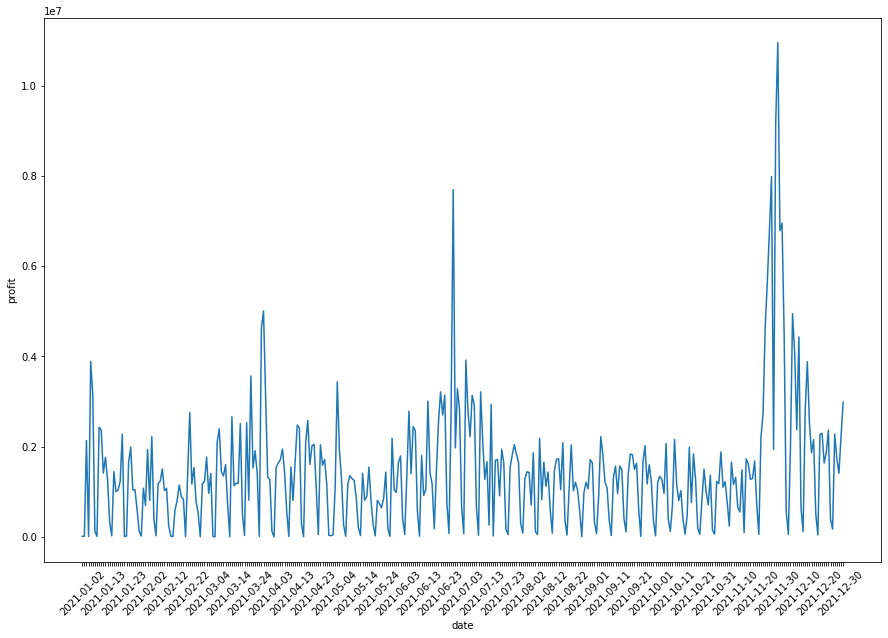

In [136]:
plt.figure(figsize=(15, 10))
g = sn.lineplot(data=generaldf2, x="date", y="profit")
plt.xticks(rotation=45)
for index, label in enumerate(g.get_xticklabels()):
    if index % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

#### The two peaks you notice are related to the Prime Day and Black Friday periods

## Outliers Analysis

For the outliers analysis we used two methods: the Tukey's IQR methodthe and Z-score model, in this way we were able to identify and eliminate the outliers present in all 5 of our datasets for the different quarters and the month of November. In the first case we identified 490 outliers, while using the second method 68.

### Tukey's IQR method

Here we used the IQR method, in this way we were able to identify and eliminate the outlier. Subsequently we also represented some graphs to show the distribution of the features after eliminating the outliers.

In [37]:
from collections import Counter

In [38]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 3 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

In [39]:
# detecting outliers
feature_list = ['sales_price', 'purchase_price', 'average_competitor_price', 'discount','profit']
Outliers_IQR = IQR_method(generaldf2,1,feature_list)

# dropping outliers
generaldf2_out = generaldf2.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of outliers is: 10098


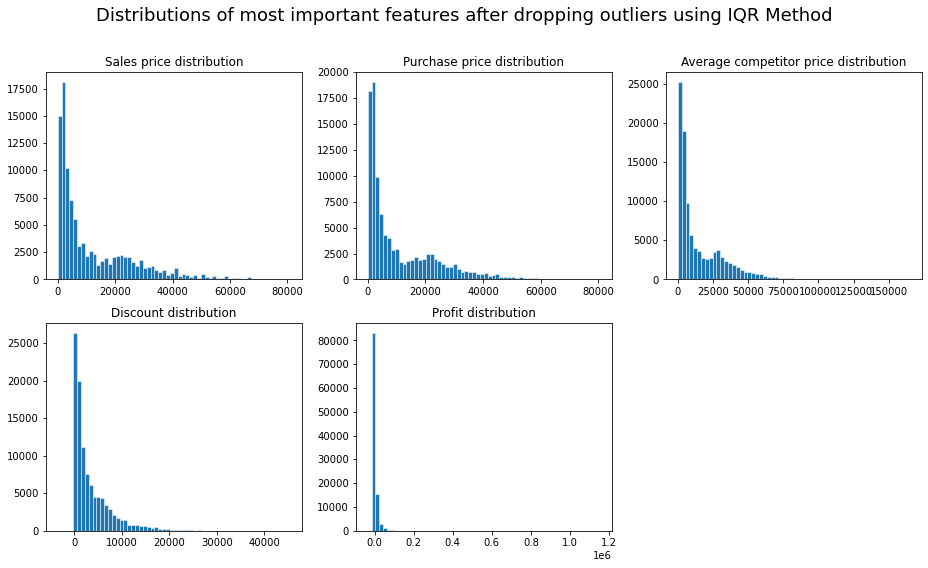

In [40]:
# Checking distributions of most important features after dropping outliers

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(13,8))
fig.suptitle('Distributions of most important features after dropping outliers using IQR Method\n', size = 18)

axes[0,0].hist(generaldf2_out['sales_price'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("Sales price distribution");

axes[0,1].hist(generaldf2_out['purchase_price'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("Purchase price distribution");

axes[0,2].hist(generaldf2_out['average_competitor_price'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("Average competitor price distribution");

axes[1,0].hist(generaldf2_out['discount'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Discount distribution");

axes[1,1].hist(generaldf2_out['profit'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("Profit distribution");

fig.delaxes(axes[1][2])

plt.tight_layout()

### Z-score method

Here we used the Z-score model, in this way we were able to identify and eliminate the outlier. Subsequently we also represented some graphs to show the distribution of the features after eliminating the outliers.

In [41]:
def z_score_method (df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the z-score method.
    """
    outlier_list = []
    
    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3
        
        z_score = abs( (df[column] - data_mean)/data_std )
        
        # Determining a list of indices of outliers for feature column        
        outlier_list_column =  df[z_score > threshold].index
        
        # appending the found outlier indices for column to the list of outlier indices 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of outlier records
    df1 = df[z_score > threshold]
    print('Total number of outliers is:', df1.shape[0])
    
    return multiple_outliers

In [42]:
# detecting outliers
feature_list = ['sales_price', 'purchase_price', 'average_competitor_price', 'discount','profit']
Outliers_z_score = z_score_method(generaldf2,1,feature_list)

# dropping outliers
df_out3 = generaldf2.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

Total number of outliers is: 1327


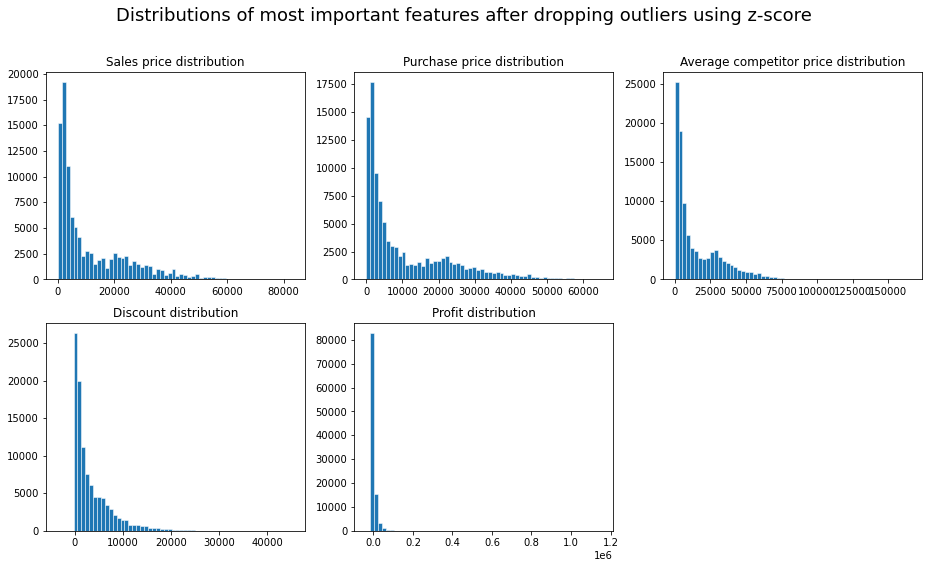

In [43]:
# Checking distributions of most important features after dropping outliers

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(13,8))
fig.suptitle('Distributions of most important features after dropping outliers using z-score\n', size = 18)

axes[0,0].hist(df_out3['sales_price'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("Sales price distribution");

axes[0,1].hist(df_out3['purchase_price'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("Purchase price distribution");

axes[0,2].hist(df_out3['average_competitor_price'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("Average competitor price distribution");

axes[1,0].hist(df_out3['discount'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Discount distribution");

axes[1,1].hist(df_out3['profit'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("Profit distribution");

fig.delaxes(axes[1][2])

plt.tight_layout()

# TASK 1 (second approach)

### The first approach is in the other file jupyter

### Importing the datasets

In [45]:
clickbidding=pd.read_csv("clicks_bidding.csv")
clickregular=pd.read_csv("clicks_regular.csv")
pricescompetitor=pd.read_csv("prices_competitor.csv")
productcatalog=pd.read_csv("product_catalog.csv")
salesdata=pd.read_csv("sales_data.csv")
sellerslist=pd.read_csv("sellers_list.csv")
stock=pd.read_csv("stock.csv")

### The first step,  we need to deleted the duplicate values from the ‘pricescompetitor’ dataset

We used this code in order to eliminate the duplicates. Due to its inefficiency, we created a csv file in order to have a faster execution of this jupyter notebook.

In [190]:
"""
sellers=list(pd.unique(pricescomp1['seller_id']))   
pricescleanq1=pd.DataFrame(columns=('date', 'seller_id', 'product_id', 'price'))
for i in sellers:
    tab1=pricescomp1[pricescomp1['seller_id']==i]
    products=list(pd.unique(tab1['product_id']))
    for k in products:
        tab=tab1[tab1['product_id']==k]
        dates=list(pd.unique(tab['date']))
        data=[]
        product=[]
        seller=[]
        for j in range(len(dates)):
            product.append(k)
            seller.append(i)
            if j==len(dates)-1:
                prevprices=list(tab[tab['date']==dates[j-1]]['price'])
                prices=list(tab[tab['date']==dates[j]]['price'])
                if len(prices)==1:
                        x=prices[0]
                elif len(prices)==2:
                    if prices[0] in prevprices:
                        x=prices[1]
                    elif prices[1] in prevprices:
                        x=prices[0]
                    else:
                        x=(prices[0]+prices[1])/2
                else:
                    for z in prices:
                        if z not in prevprices:
                            x=z
                data.append(x)
            elif j!=len(dates)-1 and j!=0:
                prevprices=list(tab[tab['date']==dates[j-1]]['price'])
                prices=list(tab[tab['date']==dates[j]]['price'])
                nextprices=list(tab[tab['date']==dates[j+1]]['price'])
                if len(prices)==1:
                        x=prices[0]
                elif len(prices)==2:
                    if prices[0] in prevprices:
                        x=prices[1]
                    elif prices[1] in prevprices:
                        x=prices[0]
                    else:
                        x=(prices[0]+prices[1])/2
                else:
                    for z in prices:
                        if z in nextprices:
                            x=z
                data.append(x)
            elif j==0:
                prices=list(tab[tab['date']==dates[j]]['price'])
                nextprices=list(tab[tab['date']==dates[j+1]]['price'])
                if len(prices)==1:
                        x=prices[0]
                elif len(prices)==2:
                    if prices[0] in nextprices:
                        x=prices[1]
                    elif prices[1] in nextprices:
                        x=prices[0]
                    else:
                        x=(prices[0]+prices[1])/2
                else:
                    for z in prices:
                        if z in nextprices:
                            x=z
                data.append(x)
        temp=pd.DataFrame(data={'date':dates, 'seller_id':seller, 'product_id':product, 'price':data})
        pricescleanq1=pd.concat([pricescleanq1, temp])
pricescleanq1.to_csv('pricescompetitorswithoutdouble.csv')
"""

"\nsellers=list(pd.unique(pricescomp1['seller_id']))   \npricescleanq1=pd.DataFrame(columns=('date', 'seller_id', 'product_id', 'price'))\nfor i in sellers:\n    tab1=pricescomp1[pricescomp1['seller_id']==i]\n    products=list(pd.unique(tab1['product_id']))\n    for k in products:\n        tab=tab1[tab1['product_id']==k]\n        dates=list(pd.unique(tab['date']))\n        data=[]\n        product=[]\n        seller=[]\n        for j in range(len(dates)):\n            product.append(k)\n            seller.append(i)\n            if j==len(dates)-1:\n                prevprices=list(tab[tab['date']==dates[j-1]]['price'])\n                prices=list(tab[tab['date']==dates[j]]['price'])\n                if len(prices)==1:\n                        x=prices[0]\n                elif len(prices)==2:\n                    if prices[0] in prevprices:\n                        x=prices[1]\n                    elif prices[1] in prevprices:\n                        x=prices[0]\n                    el

### The output of this part of the code is the following csv file, which is the entirity of pricescompetitor without the daily repeatition of products

In [192]:
pricescompclean=pd.read_csv('pricescompetitorswithoutdouble.csv',index_col=False).drop(columns='Unnamed: 0')
pricescompclean

,date,seller_id,product_id,price
0,2021-01-01,23,110064,27990.0
1,2021-01-02,23,110064,27990.0
2,2021-01-03,23,110064,27990.0
3,2021-01-04,23,110064,27990.0
4,2021-01-05,23,110064,27990.0
...,...,...,...,...
7927672,2021-12-31,490,139889,1299.0
7927673,2021-12-30,490,183301,2499.0
7927674,2021-12-31,490,183301,2499.0
7927675,2021-12-31,490,129016,3990.0


### We only consider the products in common between us and other competitors

### Products sold only by us are identified and eliminated, as it makes no sense to perform a leaders/follower analysis on those

In [193]:
def notincommon_list(df1,df2):
    notincommon=[]
    list2=df2["product_id"].unique().tolist()
    list1=df1["product_id"].unique().tolist()
    for i in list1:
        if i not in list2:
            notincommon.append(i)
    return notincommon 

### We found that there are 422 products that our competitors don't sell and 6 that they sell but don't

In [194]:
df1=pricescompclean[pricescompclean['seller_id']==24]
df2= pricescompclean[pricescompclean['seller_id'].isin([23,26,41,48,180,407,188,490])]
_24_not_ohters=notincommon_list(df1,df2)
_others_not_24=notincommon_list(df2,df1)
print(len(_24_not_ohters))
print(len(_others_not_24))

422
6


### Let's remove those otherwise we would always be leaders

In [195]:
c=0
l=[]
for i in _24_not_ohters:
    l+=list(pricescompclean[pricescompclean['product_id']==i].index)
    print(str(c)+'/'+str(len(_24_not_ohters)))
    c+=1

pricescompclean.drop(index=l , inplace=True)

0/422
1/422
2/422
3/422
4/422
5/422
6/422
7/422
8/422
9/422
10/422
11/422
12/422
13/422
14/422
15/422
16/422
17/422
18/422
19/422
20/422
21/422
22/422
23/422
24/422
25/422
26/422
27/422
28/422
29/422
30/422
31/422
32/422
33/422
34/422
35/422
36/422
37/422
38/422
39/422
40/422
41/422
42/422
43/422
44/422
45/422
46/422
47/422
48/422
49/422
50/422
51/422
52/422
53/422
54/422
55/422
56/422
57/422
58/422
59/422
60/422
61/422
62/422
63/422
64/422
65/422
66/422
67/422
68/422
69/422
70/422
71/422
72/422
73/422
74/422
75/422
76/422
77/422
78/422
79/422
80/422
81/422
82/422
83/422
84/422
85/422
86/422
87/422
88/422
89/422
90/422
91/422
92/422
93/422
94/422
95/422
96/422
97/422
98/422
99/422
100/422
101/422
102/422
103/422
104/422
105/422
106/422
107/422
108/422
109/422
110/422
111/422
112/422
113/422
114/422
115/422
116/422
117/422
118/422
119/422
120/422
121/422
122/422
123/422
124/422
125/422
126/422
127/422
128/422
129/422
130/422
131/422
132/422
133/422
134/422
135/422
136/422
137/422
138/42

In [196]:
pricescompclean

,date,seller_id,product_id,price
0,2021-01-01,23,110064,27990.0
1,2021-01-02,23,110064,27990.0
2,2021-01-03,23,110064,27990.0
3,2021-01-04,23,110064,27990.0
4,2021-01-05,23,110064,27990.0
...,...,...,...,...
7927672,2021-12-31,490,139889,1299.0
7927673,2021-12-30,490,183301,2499.0
7927674,2021-12-31,490,183301,2499.0
7927675,2021-12-31,490,129016,3990.0


### We divide our data into 5 timeframes:
* First quarter 2021
* Second quarter 2021
* Third quarter 2021
* Fourth quarter 2021
* Black Friday period (November 2021)

In [198]:
pricescompclean['date'] = pd.to_datetime(pricescompclean['date'], format='%Y/%m/%d %H:%M')
pricescleanq2 = pricescompclean.set_index(pricescompclean['date'])
q1_comp = pricescleanq2['2021-01-01':'2021-03-31'].reset_index(drop=True)
q2_comp = pricescleanq2['2021-04-01':'2021-06-30'].reset_index(drop=True)
q3_comp = pricescleanq2['2021-07-01':'2021-09-30'].reset_index(drop=True)
q4_comp= pricescleanq2['2021-10-01':'2021-12-31'].reset_index(drop=True)
qnov_comp = pricescleanq2['2021-11-01':'2021-11-30'].reset_index(drop=True)

### We created a function that takes the dataframe of the pricecompetitors and returns the same dataset, complete with missing days and takes into account the last detected price (when present) for the following days. If it is not there, the first price that appears is taken and enters it in the previous days.

From here on, we used q1_comp (the first quarter) and the product 110064 as a test for all these function, in order to show the output of each one of them. 

In [199]:
def pricescompfiller(pricescleanq1):
    seller=pd.unique(pricescleanq1['seller_id'])
    seller_id=[]
    product_id=[]
    dates=[]
    date=pd.unique(pricescleanq1['date'])
    for j in date:
        for i in seller:
            a=list(pd.unique(pricescleanq1[pricescleanq1['seller_id']==i]['product_id']))
            product_id+=a
            b=[i for k in range(len(a))]
            seller_id+=b
            c=[j for k in range(len(a))]
            dates+=c
    df=pd.DataFrame(data={'date':dates,'seller_id':seller_id, 'product_id':product_id})
    df_price= df.merge(pricescleanq1, on=['date','product_id','seller_id'], how='left')
    seller=pd.unique(df_price['seller_id'])
    products= pd.unique(df_price['product_id'])
    df4=pd.DataFrame(columns=df_price.columns)
    l=[]
    for i in seller:
        df2=df_price[df_price['seller_id']==i]
        for j in products:
            df3=df2[df2['product_id']==j].copy()
            df3.fillna(method='ffill', inplace=True)
            df3.fillna(method='bfill', inplace=True)
            l.append(df3)
    df4=pd.concat(l)
    return df4

In [206]:
test=pricescompfiller(q1_comp)
test

,date,seller_id,product_id,price
0,2021-01-01,23,110064,27990.0
26878,2021-01-02,23,110064,27990.0
53756,2021-01-03,23,110064,27990.0
80634,2021-01-04,23,110064,27990.0
107512,2021-01-05,23,110064,27990.0
...,...,...,...,...
2311418,2021-03-27,490,172293,6499.0
2338296,2021-03-28,490,172293,6499.0
2365174,2021-03-29,490,172293,6499.0
2392052,2021-03-30,490,172293,6499.0


### The following function we go to create complete ‘prices competitor’ with missing prices and builds a timeseries:

* the opening price is the price of the day

* the close price is instead the price of the next day

Due to the limitations of this algorithm the last row of the dataframe in output will always be of NAN values. it is dropped at the end of the algorithm, before the output.

In [207]:
def timeseries_generator(dataframe, product_id):
    tab=dataframe
    product=product_id
    dates=list(pd.unique(tab['date']))
    timeserie=pd.DataFrame(data={'date':dates})
    tab1=tab[tab['product_id']==product]
    seller=list(pd.unique(tab1['seller_id']))
    for i in seller:
        tab2=tab1[tab1['seller_id']==i]
        tab2=tab2.sort_values('date')
        date=list(pd.unique(tab2['date']))
        date.pop()
        prices=list(tab2['price'])
        openprices=[]
        closeprices=[]
        for j in range(len(date)):
                openprices.append(prices[j-1])
                closeprices.append(prices[j])
        nameopen='opening_price  '+str(i)
        nameclose='close_price  '+str(i)
        df=pd.DataFrame(data={'date':date, nameopen:openprices, nameclose:closeprices})
        timeserie=timeserie.merge(df, on='date', how='left')
    timeserie.dropna(inplace=True)
    return timeserie

In [216]:
test1= timeseries_generator(test,110064 )
test1

,date,opening_price 23,close_price 23,opening_price 24,close_price 24,opening_price 26,close_price 26,opening_price 41,close_price 41,opening_price 48,close_price 48,opening_price 180,close_price 180,opening_price 407,close_price 407,opening_price 490,close_price 490
0,2021-01-01,27990.0,27990.0,25769.0,27990.0,28990.0,27990.0,26388.0,27490.0,28990.0,27990.0,27549.0,28990.0,26299.0,28590.0,28990.0,28990.0
1,2021-01-02,27990.0,27990.0,27990.0,27990.0,27990.0,27990.0,27490.0,27490.0,27990.0,27990.0,28990.0,28990.0,28590.0,28590.0,28990.0,28990.0
2,2021-01-03,27990.0,27990.0,27990.0,27990.0,27990.0,27990.0,27490.0,27490.0,27990.0,27990.0,28990.0,28990.0,28590.0,28590.0,28990.0,28990.0
3,2021-01-04,27990.0,27990.0,27990.0,27990.0,27990.0,27990.0,27490.0,27490.0,27990.0,27990.0,28990.0,28990.0,28590.0,28590.0,28990.0,28990.0
4,2021-01-05,27990.0,27990.0,27990.0,27990.0,27990.0,27990.0,27490.0,27490.0,27990.0,27990.0,28990.0,28990.0,28590.0,28590.0,28990.0,28990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2021-03-26,27990.0,27990.0,25769.0,28990.0,25769.0,25769.0,26388.0,26388.0,26091.0,26091.0,27610.0,27610.0,25989.0,25989.0,28990.0,28990.0
85,2021-03-27,27990.0,27990.0,28990.0,28990.0,25769.0,25769.0,26388.0,26388.0,26091.0,26091.0,27610.0,27610.0,25989.0,25989.0,28990.0,28990.0
86,2021-03-28,27990.0,27990.0,28990.0,28990.0,25769.0,25769.0,26388.0,26388.0,26091.0,26091.0,27610.0,27610.0,25989.0,25989.0,28990.0,28990.0
87,2021-03-29,27990.0,27990.0,28990.0,25769.0,25769.0,28990.0,26388.0,26388.0,26091.0,28990.0,27610.0,27610.0,25989.0,25989.0,28990.0,28990.0


### This is the real analysis.

### We create a function that builds a dataframe for a product, analyzing the behavior of all competitors day by day.

* First it recognizes the most common rounded close price among all competitors (this will be the ‘flagged’ price).

* Next, it sees which competitors have a price that falls within a range of +/- 3% of the flagged price: these will be our candidates leaders and followers, while the others will be considered indifferent and flagged with the letter "I".

* Immediately after, it takes all the competitors that are flagged as "leaders and followers" candidates and compare the close and open price of each one of them: if open==close, then the competitor is a "leader" and will be flagged with the letter "L", otherwise, if the competitor has changed his price from one day to the next, he will be flagged as a "follower" with the letter "F".

There are situations where multiple followers change the price at the same time and set it the same: the algorithm would classify them as followers, but in the event that there is no leader in the day, they will all be considered as leaders, since it is not possible to determine who among them is actually leaders and followers. It is possible, however, to say that they are the competitors who use an automated price strategy.

In [217]:
def leaderfollower(timeserieraw):    
    dates=list(timeserieraw['date'])
    a=(len(timeserieraw.columns))
    prevflaggedprice=0
    matrix=[]
    for j in range(len(timeserieraw)):
        pricesclose=[]
        pricesopen=[]
        for i in range(2,a,2):
            pricesclose.append(timeserieraw.iloc[j,i])
            pricesopen.append(timeserieraw.iloc[j,i-1])
        rounded_prices=[int(k/10) for k in pricesclose]
        bb={i:rounded_prices.count(i) for i in rounded_prices}
        bbb = sorted(bb, key=bb.get, reverse=True)
        lista=list(bbb)
        flaggedprice=(lista[0])*10
        flagged_price_range=[i for i in range(int(flaggedprice-((flaggedprice/100)*3)), int(flaggedprice+((flaggedprice/100)*3)))] 
        candidate_l_and_f_position=[i for i in range(len(pricesclose)) if pricesclose[i] in flagged_price_range]
        positionsopen=[i for i in range(len(pricesopen))]
        indifferentflag=[i for i in positionsopen if i not in candidate_l_and_f_position]

        leaderflag=[]
        followerflag=[]
        for i in candidate_l_and_f_position:
            if pricesclose[i]==pricesopen[i]:
                leaderflag.append(i)
            else:
                followerflag.append(i)
        data=[dates[j]]

        if flaggedprice!=prevflaggedprice:
            for i in range(len(pricesclose)):
                if i in leaderflag:
                    data.append('L')
                elif i in followerflag:
                    data.append('F')
                else:
                    data.append('I')
            if 'L' not in data:
                for i in range(len(data)):
                    if data[i]=='F':
                        data[i]='L'

            prevflaggedprice=flaggedprice
        elif flaggedprice==prevflaggedprice:
            for i in range(len(pricesclose)):
                if i in leaderflag and prevdata[i+1]=='L':
                    data.append('L')
                elif i in leaderflag and prevdata[i+1]!='L':
                    data.append('F')
                elif i in followerflag:
                    data.append('F')
                else:
                    data.append('I')
            if 'L' not in data:
                for i in range(len(data)):
                    if data[i]=='F':
                        data[i]='L'


        prevdata=data
        matrix.append(data)
    labels=list(timeserieraw.columns)
    columns=[str(i[-4::1]) for i in labels]
    columns=[columns[i] for i in range(0,len(columns),2)]
    leaderfollower=pd.DataFrame(columns=columns, data=matrix)        
    
    return leaderfollower

In [218]:
test2=leaderfollower(test1)
test2

,date,23,24,26,41,48,180,407,490
0,2021-01-01,L,F,F,F,F,I,F,I
1,2021-01-02,L,F,F,F,F,I,F,I
2,2021-01-03,L,F,F,F,F,I,F,I
3,2021-01-04,L,F,F,F,F,I,F,I
4,2021-01-05,L,F,F,F,F,I,F,I
...,...,...,...,...,...,...,...,...,...
84,2021-03-26,I,F,I,I,I,I,I,L
85,2021-03-27,I,F,I,I,I,I,I,L
86,2021-03-28,I,F,I,I,I,I,I,L
87,2021-03-29,I,I,F,I,F,I,I,L


### The next function takes the list with the matrices (one per product), and a list with the corresponding ‘product_id’ (ordered as the matrices) created by the previous program and withstands, for each competitor, the percentage of days in which the competitor was a leader, follower, or indifferent.

You can specify what percentage you want (total=all and three for all competitors, L=percentage leading days for all competitors, I=percentage indifferent days for all competitors, F=percentage days followers for all competitors)

In [219]:
def aggregator(dataframes, products, flag ):
    keys=['  23', '  24', '  26', '  41', '  48', ' 180', ' 188', ' 407', ' 490']
    if flag=='total':
        flags=['I','F','L']
        columns=['product_id', 'I_%_ 23', 'F_%_ 23','L_%_ 23','I_%_ 24', 'F_%_ 24','L_%_ 24','I_%_ 26', 'F_%_ 26','L_%_ 26','I_%_ 41', 'F_%_ 41','L_%_ 41','I_%_ 48', 'F_%_ 48','L_%_ 48','I_%_180', 'F_%_180','L_%_180','I_%_188', 'F_%_188','L_%_188','I_%_407', 'F_%_407','L_%_407','I_%_490', 'F_%_490','L_%_490']
    elif flag=='F':
        flags=[flag]
        columns=['product_id', 'F_%_ 23', 'F_%_ 24',' F_%_ 26','F_%_ 41','F_%_ 48','F_%_180','F_%_188','F_%_407','F_%_490']
    elif flag=='L':
        flags=[flag]
        columns=['product_id', 'L_%_ 23', 'L_%_ 24',' L_%_ 26','L_%_ 41','L_%_ 48','L_%_180','L_%_188','L_%_407','L_%_490']
    elif flag=='I':
        flags=[flag]
        columns=['product_id', 'I_%_ 23', 'I_%_ 24',' I_%_ 26','I_%_ 41','I_%_ 48','I_%_180','I_%_188','I_%_407','I_%_490']
    matrix=[]
    l=[]
    c=0
    for a in dataframes:
        dataset={}
        for i in range(1,len(a.columns)):    
            dataset[a.columns[i]]=dict(Counter(a[a.columns[i]]))
            for j in flags:
                if j in dataset[a.columns[i]].keys():
                    dataset[a.columns[i]][j]=(dataset[a.columns[i]][j]/len(a))*100
                else:
                    dataset[a.columns[i]][j]=0
        data=[products[c]]
        for i in keys:
            if i in dataset.keys():
                for k in flags:
                        l.append(dataset[i][k])
            elif i not in dataset.keys():
                if flag=='total':
                    l=[0,0,0]
                else:
                    l=[0]
            data+=l
            l=[]
        c+=1    
        matrix.append(data)
    analysis=pd.DataFrame(columns=columns, data=matrix)
    return analysis

In [220]:
test3=aggregator([test2],[110064],'total')
test3

,product_id,I_%_ 23,F_%_ 23,L_%_ 23,I_%_ 24,F_%_ 24,L_%_ 24,I_%_ 26,F_%_ 26,L_%_ 26,...,L_%_180,I_%_188,F_%_188,L_%_188,I_%_407,F_%_407,L_%_407,I_%_490,F_%_490,L_%_490
0,110064,55.05618,0,44.94382,37.078652,51.685393,11.235955,32.58427,57.303371,10.11236,...,6.741573,0,0,0,75.280899,13.483146,11.235955,56.179775,0,43.820225


In [223]:
test3=aggregator([test2],[110064],'F')
test3

,product_id,F_%_ 23,F_%_ 24,F_%_ 26,F_%_ 41,F_%_ 48,F_%_180,F_%_188,F_%_407,F_%_490
0,110064,0,51.685393,57.303371,30.337079,53.932584,32.58427,0,13.483146,0


In [224]:
test3=aggregator([test2],[110064],'I')
test3

,product_id,I_%_ 23,I_%_ 24,I_%_ 26,I_%_ 41,I_%_ 48,I_%_180,I_%_188,I_%_407,I_%_490
0,110064,55.05618,37.078652,32.58427,57.303371,17.977528,60.674157,0,75.280899,56.179775


In [225]:
test3=aggregator([test2],[110064],'L')
test3

,product_id,L_%_ 23,L_%_ 24,L_%_ 26,L_%_ 41,L_%_ 48,L_%_180,L_%_188,L_%_407,L_%_490
0,110064,44.94382,11.235955,10.11236,12.359551,28.089888,6.741573,0,11.235955,43.820225


### We then created a function that takes the initial dataframe cleaned of the duplicates and completed with ‘pricescompfiller’, specifies the ‘flag’, and give in output a dataframe with the percentages of leader/follower/indifferent days (specified in the flag), or all three (with flag=total), for each product within the dataframe.

### It is a combination of all the previous defined functions: ‘timeseries_generator’, leaderfollower and aggregator functions.

In [ ]:
def leaderfolloweranalysis(dataframe, flag):
    dataframes=[]
    c=0
    n=list(pd.unique(dataframe['product_id']))
    for product_id in n:
        timeserieraw=timeseries_generator(dataframe, product_id)
        dataframes.append(leaderfollower(timeserieraw))
        
        c+=1
        print(str(c)+'/'+str(len(n)))
    print('loading results')
    result=aggregator(dataframes, n, flag ) 
    return result

## Here we put the analysis for each period

For a faster analysis, we recommend using the preloaded csv file as input.

## First quarter

In [ ]:
q1complete=pricescompfiller(q1_comp)
analysis1=leaderfolloweranalysis(q1complete, 'total')
analysis1.to_csv('analysiscomplete1.csv')

In [61]:
pd.read_csv('analysiscomplete1.csv',index_col=False).drop(columns='Unnamed: 0').head(20)

,product_id,I_%_ 23,F_%_ 23,L_%_ 23,I_%_ 24,F_%_ 24,L_%_ 24,I_%_ 26,F_%_ 26,L_%_ 26,...,L_%_180,I_%_188,F_%_188,L_%_188,I_%_407,F_%_407,L_%_407,I_%_490,F_%_490,L_%_490
0,110064,55.056180,0.000000,44.943820,37.078652,51.685393,11.235955,32.584270,57.303371,10.112360,...,6.741573,0.000000,0.000000,0.000000,75.280899,13.483146,11.235955,56.179775,0.0,43.820225
1,110822,49.438202,0.000000,50.561798,55.056180,43.820225,1.123596,62.921348,22.471910,14.606742,...,34.831461,0.000000,0.000000,0.000000,49.438202,0.000000,50.561798,0.000000,0.0,0.000000
2,108679,4.494382,0.000000,95.505618,24.719101,70.786517,4.494382,38.202247,61.797753,0.000000,...,0.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,4.494382,0.0,95.505618
3,108606,64.044944,2.247191,33.707865,48.314607,25.842697,25.842697,34.831461,33.707865,31.460674,...,0.000000,82.022472,0.000000,17.977528,65.168539,0.000000,34.831461,0.000000,0.0,0.000000
4,144488,5.617978,94.382022,0.000000,24.719101,64.044944,11.235955,25.842697,62.921348,11.235955,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.0,0.000000
5,108681,4.494382,0.000000,95.505618,95.505618,4.494382,0.000000,95.505618,0.000000,4.494382,...,0.000000,4.494382,0.000000,95.505618,100.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,116775,32.584270,0.000000,67.415730,14.606742,41.573034,43.820225,11.235955,77.528090,11.235955,...,0.000000,0.000000,0.000000,0.000000,32.584270,0.000000,67.415730,0.000000,0.0,0.000000
7,134961,37.078652,62.921348,0.000000,14.606742,37.078652,48.314607,11.235955,73.033708,15.730337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,111853,5.617978,84.269663,10.112360,25.842697,53.932584,20.224719,23.595506,65.168539,11.235955,...,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,111852,97.752809,0.000000,2.247191,14.606742,65.168539,20.224719,12.359551,68.539326,19.101124,...,88.764045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


## Second quarter

In [ ]:
q2complete=pricescompfiller(q2_comp)
analysis2=leaderfolloweranalysis(q2complete, 'total')
analysis2.to_csv('analysiscomplete2.csv')

In [60]:
pd.read_csv('analysiscomplete2.csv',index_col=False).drop(columns='Unnamed: 0').head(20)

,product_id,I_%_ 23,F_%_ 23,L_%_ 23,I_%_ 24,F_%_ 24,L_%_ 24,I_%_ 26,F_%_ 26,L_%_ 26,...,L_%_180,I_%_188,F_%_188,L_%_188,I_%_407,F_%_407,L_%_407,I_%_490,F_%_490,L_%_490
0,110064,92.222222,0.0,7.777778,46.666667,24.444444,28.888889,23.333333,56.666667,20.000000,...,12.222222,26.666667,0.0,73.333333,95.555556,2.222222,2.222222,26.666667,0.000000,73.333333
1,110822,60.000000,0.0,40.000000,47.777778,13.333333,38.888889,41.111111,53.333333,5.555556,...,52.222222,0.000000,0.0,0.000000,52.222222,21.111111,26.666667,0.000000,0.000000,0.000000
2,108679,53.333333,0.0,46.666667,48.888889,30.000000,21.111111,36.666667,36.666667,26.666667,...,0.000000,0.000000,0.0,0.000000,95.555556,4.444444,0.000000,53.333333,0.000000,46.666667
3,108606,77.777778,0.0,22.222222,28.888889,14.444444,56.666667,25.555556,46.666667,27.777778,...,12.222222,40.000000,0.0,60.000000,83.333333,7.777778,8.888889,0.000000,0.000000,0.000000
4,144488,0.000000,0.0,100.000000,8.888889,78.888889,12.222222,10.000000,77.777778,12.222222,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
5,108681,55.555556,0.0,44.444444,46.666667,1.111111,52.222222,45.555556,36.666667,17.777778,...,0.000000,55.555556,0.0,44.444444,64.444444,20.000000,15.555556,0.000000,0.000000,0.000000
6,116775,6.666667,0.0,93.333333,11.111111,82.222222,6.666667,15.555556,81.111111,3.333333,...,0.000000,0.000000,0.0,0.000000,6.666667,0.000000,93.333333,0.000000,0.000000,0.000000
7,134961,90.000000,0.0,10.000000,18.888889,1.111111,80.000000,10.000000,22.222222,67.777778,...,0.000000,0.000000,0.0,0.000000,97.777778,0.000000,2.222222,0.000000,0.000000,0.000000
8,111853,87.777778,0.0,12.222222,25.555556,1.111111,73.333333,13.333333,44.444444,42.222222,...,0.000000,100.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,111852,93.333333,0.0,6.666667,11.111111,73.333333,15.555556,15.555556,72.222222,12.222222,...,60.000000,6.666667,0.0,93.333333,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Third quarter

In [ ]:
q3complete=pricescompfiller(q3_comp)
analysis3=leaderfolloweranalysis(q3complete, 'total')
analysis3.to_csv('analysiscomplete3.csv')

In [59]:
pd.read_csv('analysiscomplete3.csv',index_col=False).drop(columns='Unnamed: 0').head(20)

,product_id,I_%_ 23,F_%_ 23,L_%_ 23,I_%_ 24,F_%_ 24,L_%_ 24,I_%_ 26,F_%_ 26,L_%_ 26,...,L_%_180,I_%_188,F_%_188,L_%_188,I_%_407,F_%_407,L_%_407,I_%_490,F_%_490,L_%_490
0,110064,90.109890,0.0,9.890110,47.252747,39.560440,13.186813,23.076923,69.230769,7.692308,...,8.791209,16.483516,8.791209,74.725275,90.109890,5.494505,4.395604,19.780220,0.000000,80.219780
1,110822,0.000000,0.0,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.000000,97.802198,2.197802,0.000000,0.000000,0.000000,100.000000
2,108679,50.549451,0.0,49.450549,39.560440,21.978022,38.461538,34.065934,47.252747,18.681319,...,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,50.549451,0.000000,49.450549
3,108606,83.516484,0.0,16.483516,30.769231,19.780220,49.450549,16.483516,53.846154,29.670330,...,16.483516,21.978022,12.087912,65.934066,95.604396,0.000000,4.395604,0.000000,0.000000,0.000000
4,144488,4.395604,0.0,95.604396,0.000000,76.923077,23.076923,46.153846,49.450549,4.395604,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,108681,82.417582,0.0,17.582418,8.791209,70.329670,20.879121,14.285714,63.736264,21.978022,...,0.000000,0.000000,0.000000,0.000000,29.670330,0.000000,70.329670,0.000000,0.000000,0.000000
6,116775,7.692308,0.0,92.307692,15.384615,67.032967,17.582418,15.384615,79.120879,5.494505,...,0.000000,0.000000,0.000000,0.000000,7.692308,0.000000,92.307692,0.000000,0.000000,0.000000
7,134961,85.714286,0.0,14.285714,14.285714,27.472527,58.241758,5.494505,50.549451,43.956044,...,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,111853,100.000000,0.0,0.000000,34.065934,26.373626,39.560440,6.593407,87.912088,5.494505,...,0.000000,75.824176,0.000000,24.175824,90.109890,0.000000,9.890110,0.000000,0.000000,0.000000
9,111852,94.505495,0.0,5.494505,12.087912,73.626374,14.285714,34.065934,65.934066,0.000000,...,0.000000,5.494505,0.000000,94.505495,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Fouth quarter

In [ ]:
q4complete=pricescompfiller(q4_comp)
analysis4=leaderfolloweranalysis(q4complete, 'total')
analysis4.to_csv('analysiscomplete4.csv')

In [58]:
pd.read_csv('analysiscomplete4.csv',index_col=False).drop(columns='Unnamed: 0').head(20)

,product_id,I_%_ 23,F_%_ 23,L_%_ 23,I_%_ 24,F_%_ 24,L_%_ 24,I_%_ 26,F_%_ 26,L_%_ 26,...,L_%_180,I_%_188,F_%_188,L_%_188,I_%_407,F_%_407,L_%_407,I_%_490,F_%_490,L_%_490
0,110064,100.000000,0.000000,0.000000,3.296703,61.538462,35.164835,0.000000,60.439560,39.560440,...,7.692308,72.527473,0.000000,27.472527,100.000000,0.000000,0.000000,8.791209,4.395604,86.813187
1,110822,16.483516,0.000000,83.516484,14.285714,72.527473,13.186813,7.692308,79.120879,13.186813,...,4.395604,0.000000,0.000000,0.000000,89.010989,8.791209,2.197802,0.000000,0.000000,0.000000
2,108679,92.307692,2.197802,5.494505,13.186813,75.824176,10.989011,7.692308,67.032967,25.274725,...,0.000000,0.000000,0.000000,0.000000,35.164835,18.681319,46.153846,92.307692,0.000000,7.692308
3,108606,100.000000,0.000000,0.000000,1.098901,51.648352,47.252747,5.494505,94.505495,0.000000,...,21.978022,25.274725,43.956044,30.769231,78.021978,0.000000,21.978022,0.000000,0.000000,0.000000
4,144488,3.296703,0.000000,96.703297,14.285714,0.000000,85.714286,13.186813,83.516484,3.296703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,108681,89.010989,0.000000,10.989011,10.989011,75.824176,13.186813,10.989011,16.483516,72.527473,...,0.000000,0.000000,0.000000,0.000000,98.901099,0.000000,1.098901,0.000000,0.000000,0.000000
6,116775,4.395604,0.000000,95.604396,10.989011,75.824176,13.186813,12.087912,81.318681,6.593407,...,0.000000,0.000000,0.000000,0.000000,7.692308,45.054945,47.252747,0.000000,0.000000,0.000000
7,134961,17.582418,0.000000,82.417582,10.989011,76.923077,12.087912,3.296703,84.615385,12.087912,...,0.000000,0.000000,0.000000,0.000000,97.802198,0.000000,2.197802,0.000000,0.000000,0.000000
8,111853,12.087912,87.912088,0.000000,15.384615,76.923077,7.692308,12.087912,80.219780,7.692308,...,0.000000,92.307692,7.692308,0.000000,98.901099,0.000000,1.098901,0.000000,0.000000,0.000000
9,111852,98.901099,0.000000,1.098901,51.648352,43.956044,4.395604,10.989011,82.417582,6.593407,...,94.505495,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## November

In [ ]:
qnovcomplete=pricescompfiller(qnov_comp)
analysisnov=leaderfolloweranalysis(qnovcomplete, 'total')
analysisnov.to_csv('analysiscompletenov.csv')

In [57]:
pd.read_csv('analysiscompletenov.csv',index_col=False).drop(columns='Unnamed: 0').head(20)

,product_id,I_%_ 23,F_%_ 23,L_%_ 23,I_%_ 24,F_%_ 24,L_%_ 24,I_%_ 26,F_%_ 26,L_%_ 26,...,L_%_180,I_%_188,F_%_188,L_%_188,I_%_407,F_%_407,L_%_407,I_%_490,F_%_490,L_%_490
0,116775,0.000000,0.0,100.000000,10.344828,41.379310,48.275862,10.344828,58.620690,31.034483,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,100.000000,0.000000,0.0,0.000000
1,108153,96.551724,0.0,3.448276,96.551724,0.000000,3.448276,3.448276,0.000000,96.551724,...,0.000000,100.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,107077,100.000000,0.0,0.000000,55.172414,44.827586,0.000000,3.448276,58.620690,37.931034,...,0.000000,100.000000,0.000000,0.000000,93.103448,0.0,6.896552,0.000000,0.0,0.000000
3,108178,89.655172,0.0,10.344828,0.000000,51.724138,48.275862,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,10.344828,0.0,89.655172
4,105565,3.448276,0.0,96.551724,96.551724,3.448276,0.000000,96.551724,0.000000,3.448276,...,96.551724,96.551724,3.448276,0.000000,3.448276,0.0,96.551724,0.000000,0.0,0.000000
5,107079,100.000000,0.0,0.000000,55.172414,44.827586,0.000000,3.448276,58.620690,37.931034,...,0.000000,100.000000,0.000000,0.000000,93.103448,0.0,6.896552,0.000000,0.0,0.000000
6,121682,58.620690,0.0,41.379310,6.896552,86.206897,6.896552,41.379310,17.241379,41.379310,...,10.344828,0.000000,0.000000,0.000000,100.000000,0.0,0.000000,89.655172,0.0,10.344828
7,108919,0.000000,0.0,100.000000,13.793103,82.758621,3.448276,0.000000,0.000000,100.000000,...,0.000000,17.241379,82.758621,0.000000,0.000000,0.0,0.000000,0.000000,0.0,100.000000
8,106925,0.000000,0.0,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
9,156519,0.000000,0.0,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


# TASK 2

### Loading the datasets

In [145]:
clickbidding=pd.read_csv("C:\\Users\\filpi\\Desktop\\data science n management\\anno 2022-23\\big data and smart data analytics\\progetto alkemy\\dataset\\Data Delivery\\all\\clicks_bidding.csv")
clickregular=pd.read_csv("C:\\Users\\filpi\\Desktop\\data science n management\\anno 2022-23\\big data and smart data analytics\\progetto alkemy\\dataset\\Data Delivery\\all\\clicks_regular.csv")
pricescompetitor=pd.read_csv("C:\\Users\\filpi\\Desktop\\data science n management\\anno 2022-23\\big data and smart data analytics\\progetto alkemy\\dataset\\Data Delivery\\all\\prices_competitor.csv")
productcatalog=pd.read_csv("C:\\Users\\filpi\\Desktop\\data science n management\\anno 2022-23\\big data and smart data analytics\\progetto alkemy\\dataset\\Data Delivery\\all\\product_catalog.csv")
salesdata=pd.read_csv("C:\\Users\\filpi\\Desktop\\data science n management\\anno 2022-23\\big data and smart data analytics\\progetto alkemy\\dataset\\Data Delivery\\all\\sales_data.csv")
sellerslist=pd.read_csv("C:\\Users\\filpi\\Desktop\\data science n management\\anno 2022-23\\big data and smart data analytics\\progetto alkemy\\dataset\\Data Delivery\\all\\sellers_list.csv")
stock=pd.read_csv("C:\\Users\\filpi\\Desktop\\data science n management\\anno 2022-23\\big data and smart data analytics\\progetto alkemy\\dataset\\Data Delivery\\all\\stock.csv")

# Defined functions

### This fuction counts  the number of clicks in clickbidding e regular

In [146]:
def click_counter(df1, df2, name='clicks'):
    clicks=[]
    id=list(pd.unique(df1['product_id']))
    for i in id:
        a=len(df2[df2['product_id']==i])
        clicks.append(a)
    df1[name]=clicks
    return df1

### This function calculates the average profit for each product

In [147]:
def averageprofitcalculator(df, df1):
    df['total_profit']=df['profit']*df['quantity']
    diz={}
    products=pd.unique(df['product_id'])
    for i in products:
        c=df[df['product_id']==i]['total_profit'].sum()/df[df['product_id']==i]['quantity'].sum()
        diz[i]=c
    df2=pd.DataFrame.from_dict( columns=[ 'average_profit'], data=diz, orient='index')
    df2['product_id'] = df2.index
    df3=df1.merge(df2, how='left', on='product_id').copy()
    return df3

### This fucntion normalize the features given

In [148]:
def normalizer(df, columns=[]):
    for i in columns:
        df[i+'_norm']=(df[i]-df[i].min())/(df[i].max()-df[i].min())
    return df

### This function creates the graphs

In [149]:
def graphgen(popindexq1):
    plt.figure(figsize=(15, 10))
    sn.set_style("whitegrid")
    color = ['red']
    g = sn.barplot(x="product_id", y="popularity", data=popindexq1.head(75), palette=color, order=popindexq1.head(75).sort_values('popularity', ascending = False).product_id)
    g.set_xticklabels(g.get_xticklabels(), rotation=50, horizontalalignment='right')
    g.set_ylabel('Popularity')
    g.set_xlabel('Product_id')

### The first thing we do is adding the profit variable in salesdata dataset: it will be foundamental later, in order to calculate the average profit.

In [150]:
salesdata['profit'] =salesdata['sales_price'] - salesdata['purchase_price']
salesdata

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,profit
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,582.6000
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,491.3000
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,47.0000
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,558.5976
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,792.6000
...,...,...,...,...,...,...,...,...,...
119120,2021-12-31,184595,2,3290.0,4433.0,2742.0,3694.4444,2474.2500,267.7500
119121,2021-12-31,184647,1,1990.0,2878.0,1658.0,2398.1481,1638.0000,20.0000
119122,2021-12-31,184749,1,4990.0,5544.0,4158.0,4620.3704,3600.0000,558.0000
119123,2021-12-31,184809,1,2590.0,2878.0,2158.0,2398.1481,1650.0000,508.0000


### Changing the date format, in order to use it in our analysis 


In [151]:
salesdata['sale_date'] = pd.to_datetime(salesdata['sale_date'], format='%Y/%m/%d')
pricescompetitor['comp_date'] = pd.to_datetime(pricescompetitor['comp_date'], format='%Y/%m/%d')
clickregular['date']=pd.to_datetime(clickregular['date'], format='%Y/%m/%d')
clickbidding['date']=pd.to_datetime(clickbidding['date'], format='%Y/%m/%d')
stock['stock_date'] = pd.to_datetime(stock['stock_date'], format='%Y/%m/%d')

### Dividing salesdata, clickregular and clickbidding dataset in the 5 time periods

In [152]:
sales = salesdata.set_index(salesdata['sale_date'])
q1_sales = sales['2021-01-01':'2021-03-31'].reset_index(drop=True)
q2_sales = sales['2021-04-01':'2021-06-30'].reset_index(drop=True)
q3_sales = sales['2021-07-01':'2021-09-30'].reset_index(drop=True)
q4_sales= sales['2021-10-01':'2021-12-31'].reset_index(drop=True)
qnov_sales = sales['2021-11-01':'2021-11-30'].reset_index(drop=True)

In [153]:
clickregular1 =clickregular[clickregular['seller']==24].set_index('date').copy()
q1_reg=clickregular1['2021-01-01':'2021-03-31'].reset_index().copy()
q2_reg=clickregular1['2021-04-01':'2021-06-30'].reset_index().copy()
q3_reg=clickregular1['2021-07-01':'2021-09-30'].reset_index().copy()
q4_reg=clickregular1['2021-09-30':'2021-12-31'].reset_index().copy()
qnov_reg=clickregular1['2021-11-01':'2021-11-30'].reset_index().copy()

C:\Users\filpi\AppData\Local\Temp/ipykernel_22624/1608682600.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  q1_reg=clickregular1['2021-01-01':'2021-03-31'].reset_index().copy()
C:\Users\filpi\AppData\Local\Temp/ipykernel_22624/1608682600.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  q2_reg=clickregular1['2021-04-01':'2021-06-30'].reset_index().copy()
C:\Users\filpi\AppData\Local\Temp/ipykernel_22624/1608682600.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  q3_reg=clickregular1['2021-07-01':'2021-09-30'].reset_index().copy()
C:\Users\filpi\AppData\Local\Temp/ipykernel_22624/1608682600.py:5: FutureWarning: Value based partial slic

In [154]:
clickbidding1 =clickbidding[clickbidding['seller']==24].set_index('date').copy()
q1_bid=clickbidding1['2021-01-01' :'2021-03-31'].reset_index().copy()
q2_bid=clickbidding1['2021-04-01' :'2021-06-30'].reset_index().copy()
q3_bid=clickbidding1['2021-07-01' :'2021-09-30'].reset_index().copy()
q4_bid=clickbidding1['2021-09-30' :'2021-12-31'].reset_index().copy()
qnov_bid=clickbidding1['2021-11-01' :'2021-11-30'].reset_index().copy()

C:\Users\filpi\AppData\Local\Temp/ipykernel_22624/613039876.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  q1_bid=clickbidding1['2021-01-01' :'2021-03-31'].reset_index().copy()
C:\Users\filpi\AppData\Local\Temp/ipykernel_22624/613039876.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  q2_bid=clickbidding1['2021-04-01' :'2021-06-30'].reset_index().copy()
C:\Users\filpi\AppData\Local\Temp/ipykernel_22624/613039876.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  q3_bid=clickbidding1['2021-07-01' :'2021-09-30'].reset_index().copy()
C:\Users\filpi\AppData\Local\Temp/ipykernel_22624/613039876.py:5: FutureWarning: Value based partial slici

### Creating 5 new dataframe, one for each period of time

In [155]:
popindexq1=pd.DataFrame(data={'product_id':pd.unique(q1_sales['product_id'])})
popindexq2=pd.DataFrame(data={'product_id':pd.unique(q2_sales['product_id'])})
popindexq3=pd.DataFrame(data={'product_id':pd.unique(q3_sales['product_id'])})
popindexq4=pd.DataFrame(data={'product_id':pd.unique(q4_sales['product_id'])})
popindexqnov=pd.DataFrame(data={'product_id':pd.unique(qnov_sales['product_id'])})

### Here we counted the quantity sold for each product in each period of salesdata and we merged the number of single products sold for each period with each popularity index dataframe


In [156]:
a1=q1_sales.groupby('product_id', as_index=False).sum('quantity')
a2=q2_sales.groupby('product_id', as_index=False).sum('quantity')
a3=q3_sales.groupby('product_id', as_index=False).sum('quantity')
a4=q4_sales.groupby('product_id', as_index=False).sum('quantity')
anov=qnov_sales.groupby('product_id', as_index=False).sum('quantity')

In [157]:
popindexq1=popindexq1.merge(a1, how='left', on='product_id').drop(['sales_price_tax','regular_price_tax', 'sales_price', 'regular_price','purchase_price', 'profit'], axis=1).copy()
popindexq2=popindexq2.merge(a2, how='left', on='product_id').drop(['sales_price_tax','regular_price_tax', 'sales_price', 'regular_price','purchase_price', 'profit'], axis=1).copy()   
popindexq3=popindexq3.merge(a3, how='left', on='product_id').drop(['sales_price_tax','regular_price_tax', 'sales_price', 'regular_price','purchase_price', 'profit'], axis=1).copy()   
popindexq4=popindexq4.merge(a4, how='left', on='product_id').drop(['sales_price_tax','regular_price_tax', 'sales_price', 'regular_price','purchase_price', 'profit'], axis=1).copy()
popindexqnov=popindexqnov.merge(anov, how='left', on='product_id').drop(['sales_price_tax','regular_price_tax', 'sales_price', 'regular_price','purchase_price', 'profit'], axis=1).copy()  

In [158]:
popindexq1

,product_id,quantity
0,109751,9
1,110853,502
2,131410,9
3,134294,7
4,134298,10
...,...,...
4782,161625,1
4783,161962,1
4784,162080,1
4785,162081,4


### Using the defined function "click_counter" we counted the number of clicks in 'clickbidding' e 'clickregular' , and we added them to the popularity index dataframe

In [159]:
popindexq1=click_counter(popindexq1, q1_reg, name='clicks_regular')
popindexq2=click_counter(popindexq2, q2_reg, name='clicks_regular')
popindexq3=click_counter(popindexq3, q3_reg, name='clicks_regular')
popindexq4=click_counter(popindexq4, q4_reg, name='clicks_regular')
popindexqnov=click_counter(popindexqnov, qnov_reg, name='clicks_regular')
#popindexq1=click_counter(popindexq1, q1_bid, name='clicks_regular')# the first quarter doesn't have data in clickbidding
popindexq2=click_counter(popindexq2, q2_bid, name='clicks_bidding')
popindexq3=click_counter(popindexq3, q3_bid, name='clicks_bidding')
popindexq4=click_counter(popindexq4, q4_bid, name='clicks_bidding')
popindexqnov=click_counter(popindexqnov, qnov_bid, name='clicks_bidding')

In [160]:
popindexq1

,product_id,quantity,clicks_regular
0,109751,9,49
1,110853,502,203
2,131410,9,0
3,134294,7,12
4,134298,10,17
...,...,...,...
4782,161625,1,0
4783,161962,1,11
4784,162080,1,0
4785,162081,4,0


### Using the defined function "averageprofitcalculator"  we extracted the average profit value for each product and added them to the popularity index dataframe

In [161]:
popindexq1=averageprofitcalculator(q1_sales,popindexq1)
popindexq2=averageprofitcalculator(q2_sales,popindexq2)
popindexq3=averageprofitcalculator(q3_sales,popindexq3)
popindexq4=averageprofitcalculator(q4_sales,popindexq4)
popindexqnov=averageprofitcalculator(qnov_sales,popindexqnov)

In [162]:
popindexqnov

,product_id,quantity,clicks_regular,clicks_bidding,average_profit
0,100264,7,7,0,1391.714286
1,100611,2,0,0,309.780000
2,100625,1,2,0,377.160000
3,102547,16,3,5,282.531250
4,102548,13,3,1,448.394231
...,...,...,...,...,...
3865,166072,1,13,18,2638.000000
3866,172362,1,0,0,294.637200
3867,182982,1,2,3,3184.800000
3868,183286,3,0,1,-665.000000


## The newly created dataframes are our starting datasets for performing the analysis. To avoid distortions during normalization, we decided to perform an analysis of the outliers: we used the Z-score method

For the outliers analysis we used the Z-score model, like in we did in task 0, in this way we were able to identify and eliminate the outliers present in all 5 of our datasets for the different quarters and the month of November. Subsequently we also represented some graphs to show the distribution of the features after eliminating the outliers.

In [163]:
def z_score_method (df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the z-score method.
    """
    outlier_list = []
    
    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3
        
        z_score = abs( (df[column] - data_mean)/data_std )
        
        # Determining a list of indices of outliers for feature column        
        outlier_list_column =  df[z_score > threshold].index
        
        # appending the found outlier indices for column to the list of outlier indices 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of outlier records
    df1 = df[z_score > threshold]
    print('Total number of outliers is:', df1.shape[0])
    
    return multiple_outliers

### Outliers analysis for the first quarter

In [164]:
# detecting outliers
feature_list = ['clicks_regular', 'quantity','average_profit']
Outliers_z_score = z_score_method(popindexq1,1,feature_list)

# dropping outliers
df_out1 = popindexq1.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

Total number of outliers is: 84


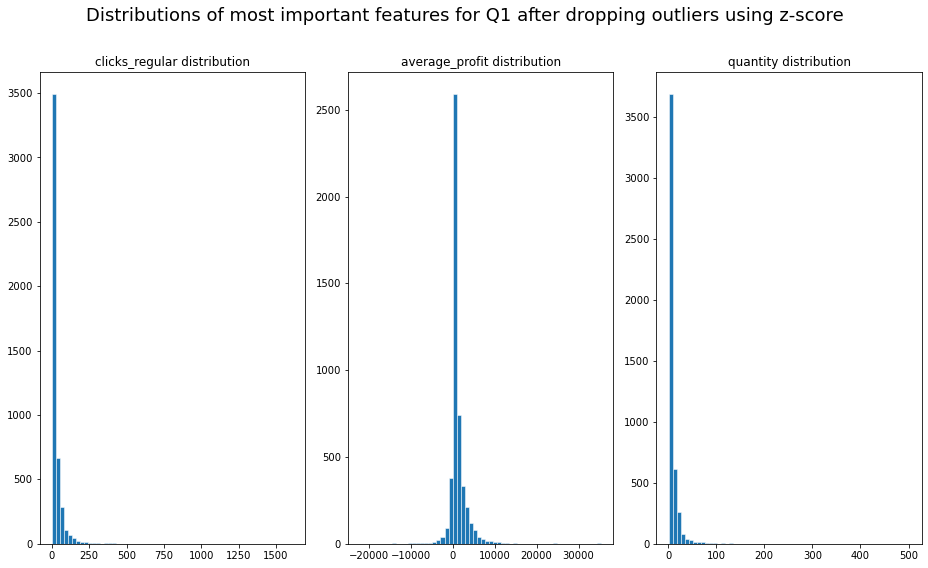

In [165]:
#Checking distributions of most important features after dropping the outliers

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(13,8))
fig.suptitle('Distributions of most important features for Q1 after dropping outliers using z-score\n', size = 18)

axes[0].hist(df_out1['clicks_regular'], bins=60, linewidth=0.5, edgecolor="white")
axes[0].set_title("clicks_regular distribution");

axes[1].hist(df_out1['average_profit'], bins=60, linewidth=0.5, edgecolor="white")
axes[1].set_title("average_profit distribution");

axes[2].hist(df_out1['quantity'], bins=60, linewidth=0.5, edgecolor="white")
axes[2].set_title("quantity distribution");

plt.tight_layout()

###  Outliers analysis for the second quarter

In [166]:
# detecting outliers
feature_list = ['clicks_regular','clicks_bidding', 'quantity','average_profit']
Outliers_z_score = z_score_method(popindexq2,1,feature_list)

# dropping outliers
df_out2 = popindexq2.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

Total number of outliers is: 61


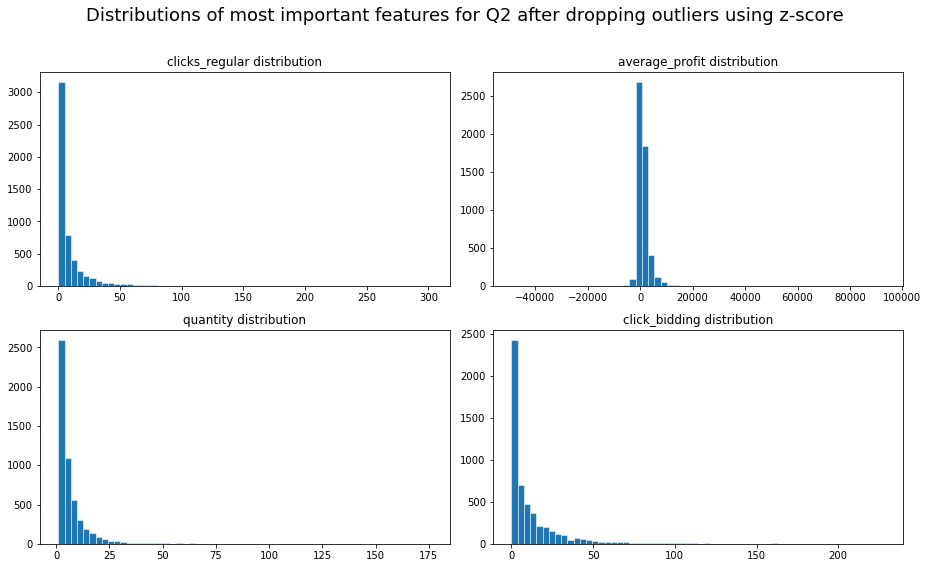

In [167]:
#Checking distributions of most important features after dropping the outliers

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13,8))
fig.suptitle('Distributions of most important features for Q2 after dropping outliers using z-score\n', size = 18)

axes[0,0].hist(df_out2['clicks_regular'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("clicks_regular distribution");

axes[0,1].hist(df_out2['average_profit'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("average_profit distribution");

axes[1,0].hist(df_out2['quantity'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("quantity distribution");

axes[1,1].hist(df_out2['clicks_bidding'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("click_bidding distribution");


plt.tight_layout()

###  Outliers analysis for the third quarter

In [168]:
# detecting outliers
feature_list = ['clicks_regular','clicks_bidding', 'quantity','average_profit']
Outliers_z_score = z_score_method(popindexq3,1,feature_list)

# dropping outliers
df_out3 = popindexq3.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

Total number of outliers is: 95


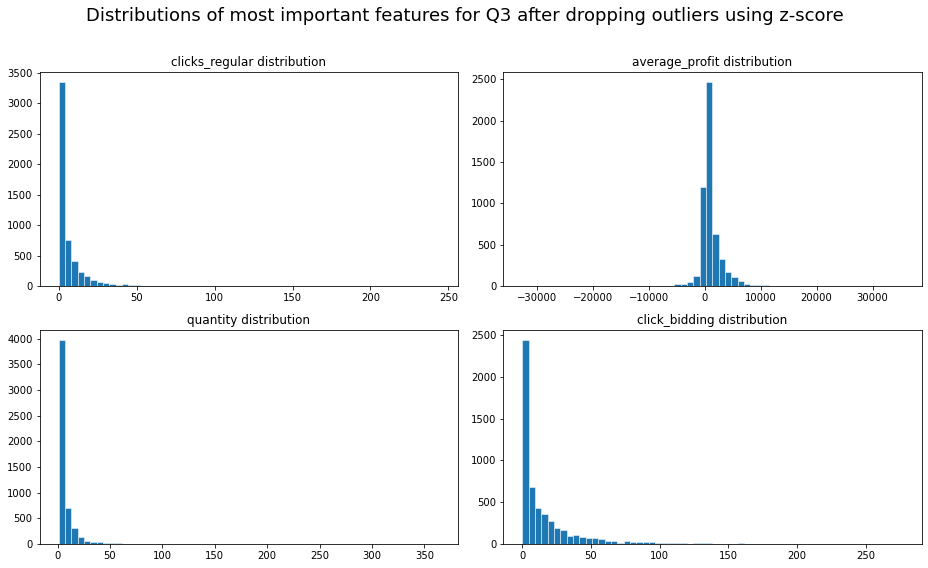

In [169]:
#Checking distributions of most important features after dropping the outliers

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13,8))
fig.suptitle('Distributions of most important features for Q3 after dropping outliers using z-score\n', size = 18)

axes[0,0].hist(df_out3['clicks_regular'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("clicks_regular distribution");

axes[0,1].hist(df_out3['average_profit'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("average_profit distribution");

axes[1,0].hist(df_out3['quantity'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("quantity distribution");

axes[1,1].hist(df_out3['clicks_bidding'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("click_bidding distribution");


plt.tight_layout()

###  Outliers analysis for the fourth quarter

In [170]:
# detecting outliers
feature_list = ['clicks_regular','clicks_bidding', 'quantity','average_profit']
Outliers_z_score = z_score_method(popindexq4,1,feature_list)

# dropping outliers
df_out4 = popindexq4.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

Total number of outliers is: 99


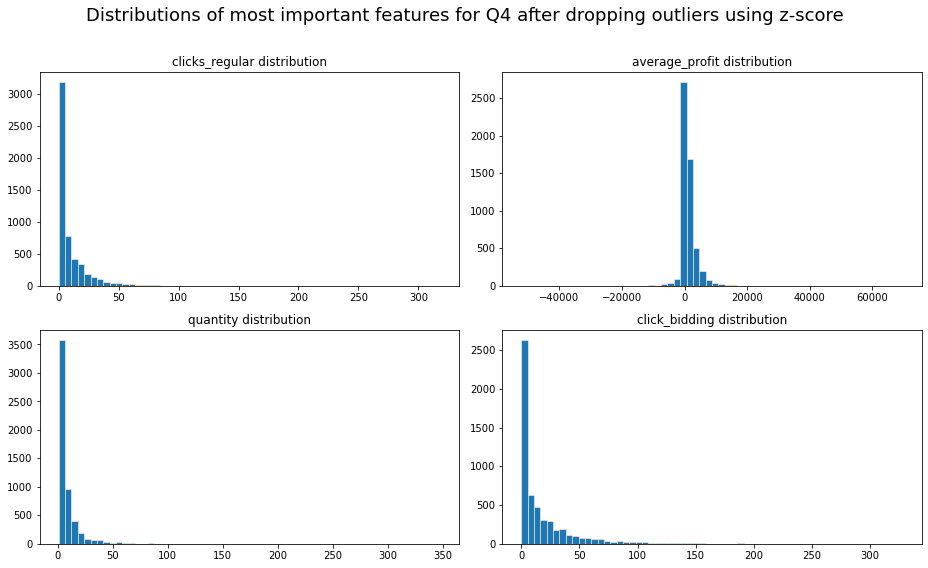

In [171]:
#Checking distributions of most important features after dropping the outliers

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13,8))
fig.suptitle('Distributions of most important features for Q4 after dropping outliers using z-score\n', size = 18)

axes[0,0].hist(df_out4['clicks_regular'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("clicks_regular distribution");

axes[0,1].hist(df_out4['average_profit'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("average_profit distribution");

axes[1,0].hist(df_out4['quantity'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("quantity distribution");

axes[1,1].hist(df_out4['clicks_bidding'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("click_bidding distribution");


plt.tight_layout()

###  Outliers analysis for november

In [172]:
# detecting outliers
feature_list = ['clicks_regular','clicks_bidding', 'quantity','average_profit']
Outliers_z_score = z_score_method(popindexqnov,1,feature_list)

# dropping outliers
df_outnov = popindexqnov.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

Total number of outliers is: 79


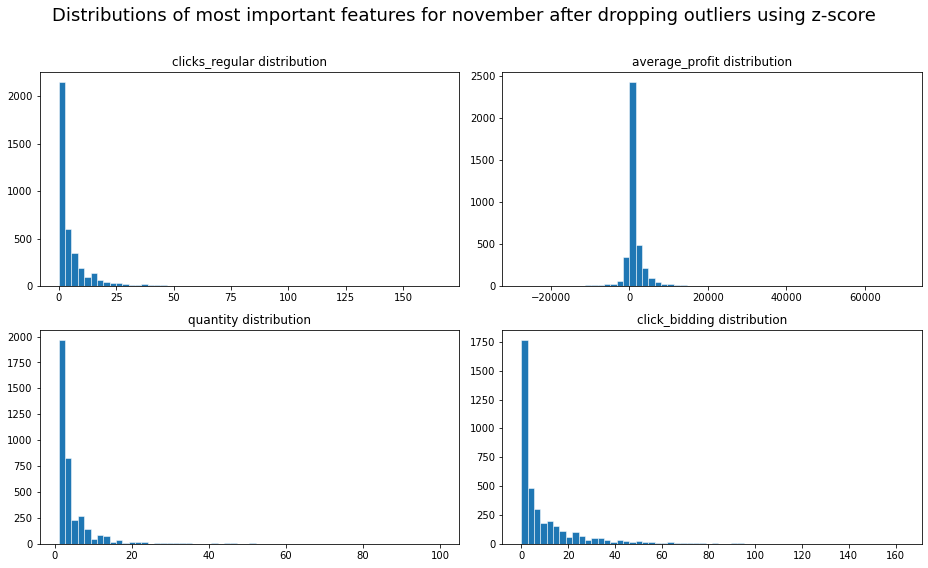

In [173]:
#Checking distributions of most important features after dropping the outliers

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13,8))
fig.suptitle('Distributions of most important features for november after dropping outliers using z-score\n', size = 18)

axes[0,0].hist(df_outnov['clicks_regular'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("clicks_regular distribution");

axes[0,1].hist(df_outnov['average_profit'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("average_profit distribution");

axes[1,0].hist(df_outnov['quantity'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("quantity distribution");

axes[1,1].hist(df_outnov['clicks_bidding'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("click_bidding distribution");


plt.tight_layout()

## Lets normilize the data using the defined function "normalizer"

In [174]:
popindexq1=normalizer(df_out1,['quantity','clicks_regular', 'average_profit'])
popindexq2=normalizer(df_out2,['quantity','clicks_regular','clicks_bidding','average_profit'])
popindexq3=normalizer(df_out3,['quantity','clicks_regular','clicks_bidding','average_profit'])
popindexq4=normalizer(df_out4,['quantity','clicks_regular','clicks_bidding','average_profit'])
popindexqnov=normalizer(df_outnov,['quantity','clicks_regular','clicks_bidding','average_profit'])

## After the normalization process, we combine all the normalized values using different weights for the variables. Then we add the new values to the respective dataframes 

In [175]:
#weights
a1=0.40 #quantity q1
b1=0.30 #number of regular clicks q1
d1=0.30 #average profit for q1
a=0.40 #quantity
b=0.23 #number of regular clicks
c=0.07 #number of bidding clicks
d=0.30 #average profit
popindexq1['popularity']=popindexq1['quantity_norm']*a1+popindexq1['clicks_regular_norm']*b1+popindexq1['average_profit_norm']*d1
popindexq2['popularity']=popindexq2['quantity_norm']*a+popindexq2['clicks_regular_norm']*b+popindexq2['clicks_bidding_norm']*c+popindexq2['average_profit_norm']*d
popindexq3['popularity']=popindexq3['quantity_norm']*a+popindexq3['clicks_regular_norm']*b+popindexq3['clicks_bidding_norm']*c+popindexq3['average_profit_norm']*d
popindexq4['popularity']=popindexq4['quantity_norm']*a+popindexq4['clicks_regular_norm']*b+popindexq4['clicks_bidding_norm']*c+popindexq4['average_profit_norm']*d
popindexqnov['popularity']=popindexqnov['quantity_norm']*a+popindexqnov['clicks_regular_norm']*b+popindexqnov['clicks_bidding_norm']*c+popindexqnov['average_profit_norm']*d

## These are the resulting dataframe sorted by popularity with the respective graphs (we selected the first 20 products)

## First quarter

In [176]:
popindexq1=popindexq1.sort_values('popularity', ascending=False).head(20)
popindexq1

,product_id,quantity,clicks_regular,average_profit,quantity_norm,clicks_regular_norm,average_profit_norm,popularity
1,110853,502,203,313.470319,1.000000,0.125931,0.389928,0.554757
1141,132392,10,1612,1058.633530,0.017964,1.000000,0.402891,0.428053
316,153993,26,1118,975.461515,0.049900,0.693548,0.401444,0.348458
2634,157777,1,67,34739.620100,0.000000,0.041563,0.988833,0.309119
2397,159870,1,0,35381.500000,0.000000,0.000000,1.000000,0.300000
3545,160992,15,139,27982.027000,0.027944,0.086228,0.871273,0.298428
645,154311,51,734,-880.850478,0.099800,0.455335,0.369150,0.287266
3544,160989,1,59,30528.435800,0.000000,0.036600,0.915572,0.285652
321,154156,8,822,2219.375012,0.013972,0.509926,0.423084,0.285492
54,107645,178,46,179.254944,0.353293,0.028536,0.387593,0.266156


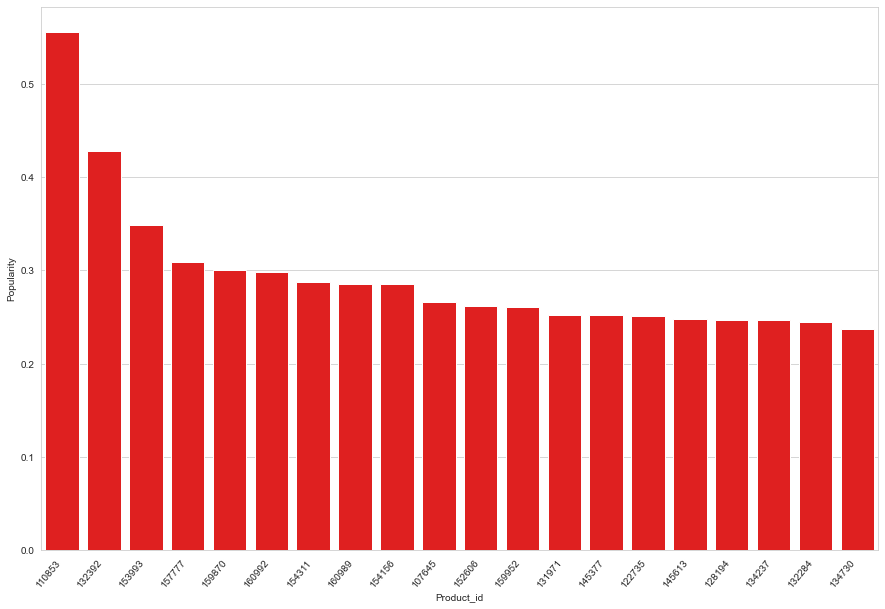

In [177]:
graphgen(popindexq1)

## Second quarter

In [178]:
popindexq2=popindexq2.sort_values('popularity', ascending=False).head(20)
popindexq2

,product_id,quantity,clicks_regular,clicks_bidding,average_profit,quantity_norm,clicks_regular_norm,clicks_bidding_norm,average_profit_norm,popularity
366,156866,164,43,48,1275.536658,0.931429,0.142384,0.210526,0.354446,0.526391
359,156474,157,60,47,924.296823,0.891429,0.198675,0.206140,0.351974,0.522289
548,131910,176,0,0,299.390827,1.000000,0.000000,0.000000,0.347576,0.504273
54,110853,138,73,100,470.052058,0.782857,0.241722,0.438596,0.348777,0.504074
554,132408,154,31,44,545.923249,0.874286,0.102649,0.192982,0.349311,0.491626
2935,106100,168,0,0,124.047619,0.954286,0.000000,0.000000,0.346342,0.485617
3549,150667,142,25,0,5222.964605,0.805714,0.082781,0.000000,0.382229,0.455994
276,145377,136,18,5,144.941176,0.771429,0.059603,0.021930,0.346489,0.427762
2918,160952,133,7,0,-108.966165,0.754286,0.023179,0.000000,0.344702,0.410456
485,107591,99,57,88,-62.533333,0.560000,0.188742,0.385965,0.345029,0.397937


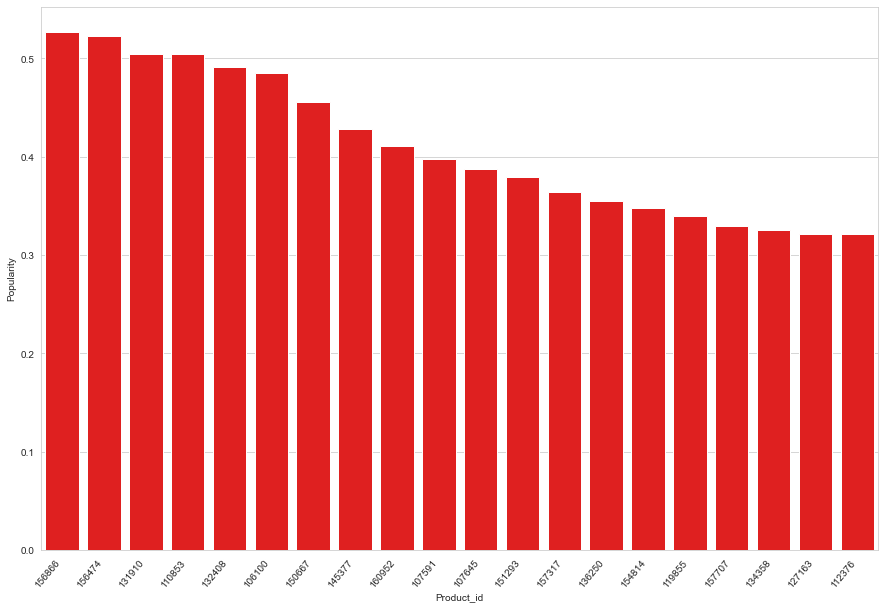

In [179]:
graphgen(popindexq2)

## Third quarter

In [180]:
popindexq3=popindexq3.sort_values('popularity', ascending=False).head(20)
popindexq3

,product_id,quantity,clicks_regular,clicks_bidding,average_profit,quantity_norm,clicks_regular_norm,clicks_bidding_norm,average_profit_norm,popularity
55,112582,364,0,0,49.754649,1.000000,0.000000,0.000000,0.481047,0.544314
677,160656,45,244,37,626.345120,0.121212,1.000000,0.133574,0.489516,0.434690
1406,136250,230,0,0,-122.265217,0.630854,0.000000,0.000000,0.478520,0.395898
675,160649,197,0,0,5053.769140,0.539945,0.000000,0.000000,0.554546,0.382342
4240,153787,1,186,3,3490.646500,0.000000,0.762295,0.010830,0.531587,0.335562
983,160651,122,35,29,3998.362411,0.333333,0.143443,0.104693,0.539044,0.335367
982,160648,44,89,58,6104.398618,0.118457,0.364754,0.209386,0.569978,0.316927
47,110908,138,8,32,-5.717311,0.377410,0.032787,0.115523,0.480232,0.310661
1677,159870,2,0,0,35381.250000,0.002755,0.000000,0.000000,1.000000,0.301102
2197,162004,23,49,224,6785.763922,0.060606,0.200820,0.808664,0.579986,0.301033


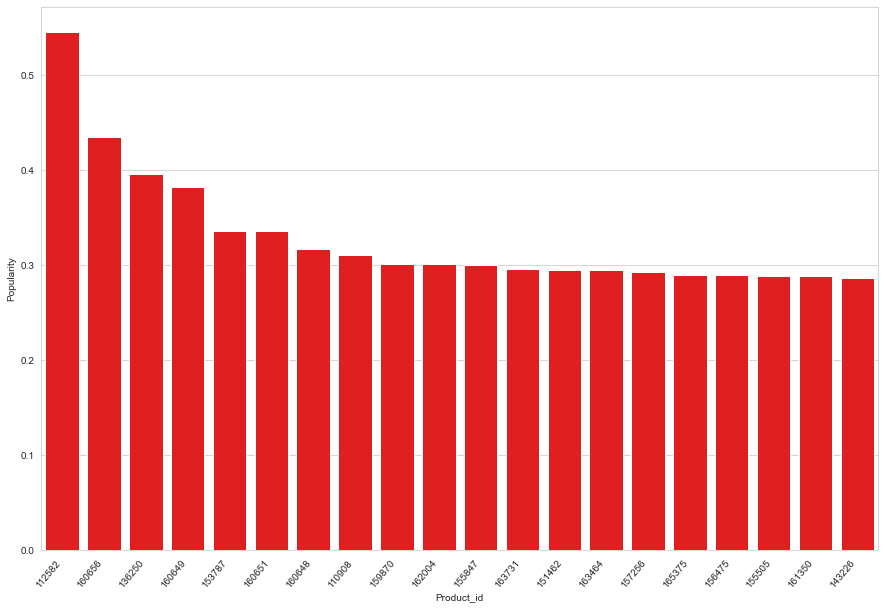

In [181]:
graphgen(popindexq3)

## Fourth quarter 

In [182]:
popindexq4=popindexq4.sort_values('popularity', ascending=False).head(20)
popindexq4

,product_id,quantity,clicks_regular,clicks_bidding,average_profit,quantity_norm,clicks_regular_norm,clicks_bidding_norm,average_profit_norm,popularity
4451,177925,347,37,69,763.673720,1.000000,0.116352,0.210366,0.434408,0.571809
2154,110675,274,14,56,-121.779363,0.789017,0.044025,0.170732,0.427135,0.465824
2628,126707,242,23,125,525.942149,0.696532,0.072327,0.381098,0.432455,0.451661
65,125506,183,51,119,173.649995,0.526012,0.160377,0.362805,0.429561,0.401556
2692,156388,10,318,21,-1908.600000,0.026012,1.000000,0.064024,0.412458,0.368624
809,139935,166,30,100,131.849398,0.476879,0.094340,0.304878,0.429218,0.362556
4188,156472,164,17,25,-12.766921,0.471098,0.053459,0.076220,0.428030,0.334479
3901,177924,159,14,35,513.000000,0.456647,0.044025,0.106707,0.432349,0.329959
3823,148593,154,6,50,-343.659740,0.442197,0.018868,0.152439,0.425312,0.319483
4450,177921,134,24,60,384.000000,0.384393,0.075472,0.182927,0.431289,0.313307


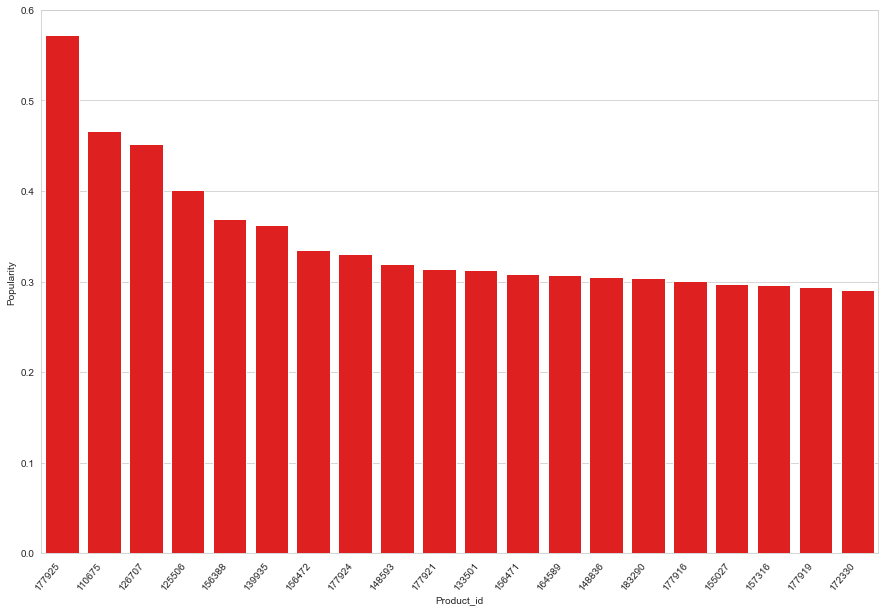

In [183]:
graphgen(popindexq4)

## November

In [184]:
popindexqnov=popindexqnov.sort_values('popularity', ascending=False).head(20)
popindexqnov

,product_id,quantity,clicks_regular,clicks_bidding,average_profit,quantity_norm,clicks_regular_norm,clicks_bidding_norm,average_profit_norm,popularity
42,110675,100,7,35,-105.138200,1.000000,0.042169,0.214724,0.282371,0.509441
84,126707,87,9,50,485.068966,0.868687,0.054217,0.306748,0.288445,0.467951
3243,177925,83,23,14,757.484237,0.828283,0.138554,0.085890,0.291249,0.456568
2752,156472,86,6,17,-55.077326,0.858586,0.036145,0.104294,0.282886,0.443914
2118,177924,79,7,16,513.000000,0.787879,0.042169,0.098160,0.288733,0.418341
1008,161863,72,8,24,33.985563,0.717172,0.048193,0.147239,0.283803,0.393401
386,164223,16,166,0,259.573350,0.151515,1.000000,0.000000,0.286124,0.376443
409,166499,56,13,60,91.321429,0.555556,0.078313,0.368098,0.284393,0.351319
2242,166371,2,155,65,4091.999950,0.010101,0.933735,0.398773,0.325567,0.344384
1549,164589,3,164,0,4652.333333,0.020202,0.987952,0.000000,0.331334,0.334710


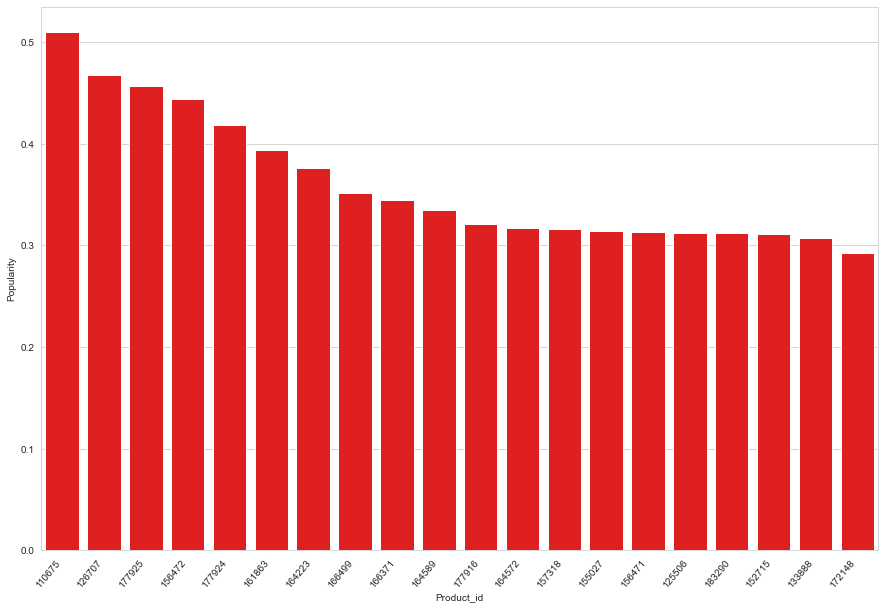

In [186]:
graphgen(popindexqnov)